In [ ]:
import pandas as pd
# Set the option to display all columns, None means no maximum width
pd.set_option('display.max_columns',None)

import numpy as np


# remember to delete repeated imports


In [ ]:
import time

def time_passed(end_time,start_time):
    elapsed_time = end_time - start_time
    return(elapsed_time)

def convert_seconds(elapsed_time):
    hours, rem = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds


def print_time_elapsed(times,elapsed_time):
    hours,minutes,seconds=times

    if elapsed_time < 120:
        return(print(f"The code took {elapsed_time:.2f} seconds to run"))
    elif elapsed_time < 7200:
        return(print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run"))
    else:
        return(print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run"))



def the_timer(end_time,start_time):
    return(print_time_elapsed(convert_seconds(time_passed(end_time,start_time))))


# DS

# Model & Order
Daniel Sa #DS

Liang Gang #LG

Nia Gangar #NG

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Mining Project/Sentencing_20240210.csv')

<ipython-input-99-0dfbf5227b26>:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Data Mining Project/Sentencing_20240210.csv')


In [ ]:
values_to_keep = [
    'Prison',
    'Probation',
    'Jail',
    'Supervision',
    '2nd Chance Probation',
    'Conditional Discharge'
]

df = df[df['SENTENCE_TYPE'].isin(values_to_keep)]

# DS

# The other values are less than 1% of cases each
# and do not have enough observations to train on

## CLEANING

In [ ]:
df.head(2)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
4,107610059386,542197950948,08/15/1984 12:00:00 AM,PROMIS Conversion,False,350203745137,288896287527,HOME INVASION,13,12/17/2014 12:00:00 AM,38-12-11-A(1),NaN,NaN,X,0000001846,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,30.0,Year(s),10982.0,27.0,Black,Male,NaN,08/09/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion
6,107610059386,542197950948,08/15/1984 12:00:00 AM,PROMIS Conversion,False,350204093671,330754760272,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,38-18-2-A,NaN,NaN,X,0000002150,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,30.0,Year(s),10982.0,27.0,Black,Male,NaN,08/09/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion


In [ ]:
len(df['CASE_ID'].unique()),len(df)

# LG

(230399, 283170)

In [ ]:
len(df['CASE_PARTICIPANT_ID'].unique()),len(df)

# LG

(246224, 283170)

In [ ]:
len(df)

283170

In [ ]:
# Using only the current sentence ( the final one, after appeals )
# For example, a defendant sentenced initially with probation but who violated that probation will be resentenced making the new sentence the Current_Sentence and reflected with a “1”.
df=df[df['CURRENT_SENTENCE_FLAG']==1]

# LG

In [ ]:
len(df)

274031

In [ ]:
len(df['CASE_ID'].unique()),len(df)

#NG

(229411, 274031)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274031 entries, 4 to 287789
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            274031 non-null  int64  
 1   CASE_PARTICIPANT_ID                274031 non-null  int64  
 2   RECEIVED_DATE                      274031 non-null  object 
 3   OFFENSE_CATEGORY                   274031 non-null  object 
 4   PRIMARY_CHARGE_FLAG                274031 non-null  bool   
 5   CHARGE_ID                          274031 non-null  int64  
 6   CHARGE_VERSION_ID                  274031 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  274031 non-null  object 
 8   CHARGE_COUNT                       274031 non-null  int64  
 9   DISPOSITION_DATE                   274031 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        274031 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2690

In [ ]:
df.SENTENCE_DATE

4         10/16/2014 12:00:00 AM
6         10/16/2014 12:00:00 AM
9         10/16/2014 12:00:00 AM
12        08/06/2014 12:00:00 AM
14        08/06/2014 12:00:00 AM
                   ...          
287785    08/23/2023 12:00:00 AM
287786    08/22/2023 12:00:00 AM
287787    08/22/2023 12:00:00 AM
287788    08/15/2023 12:00:00 AM
287789    08/29/2023 12:00:00 AM
Name: SENTENCE_DATE, Length: 274031, dtype: object

In [ ]:
### Delete rows when SENTENCE_DATE starts with year 29--, 22--, 21--, 25--, 19--, 12--, 11--, 15--

# LG

In [ ]:
df.SENTENCE_DATE.str[7].value_counts()

0    273990
9        18
2        11
1        11
5         1
Name: SENTENCE_DATE, dtype: int64

In [ ]:
deleterow = (df.SENTENCE_DATE.str[7] == '9') | (df.SENTENCE_DATE.str[7] == '2') | (df.SENTENCE_DATE.str[7] == '1') | (df.SENTENCE_DATE.str[7] == '5')
#NG

In [ ]:

df = df[~deleterow]
#NG

In [ ]:
df['SENTENCE_DATE'] = pd.to_datetime(df['SENTENCE_DATE'])
df['SENTENCE_DATE']

#NG

4        2014-10-16
6        2014-10-16
9        2014-10-16
12       2014-08-06
14       2014-08-06
            ...    
287785   2023-08-23
287786   2023-08-22
287787   2023-08-22
287788   2023-08-15
287789   2023-08-29
Name: SENTENCE_DATE, Length: 273990, dtype: datetime64[ns]

In [ ]:
df['SENTENCE_DATE'].value_counts()

2011-12-14    233
2013-10-30    225
2014-02-20    216
2012-07-16    199
2013-12-16    192
             ... 
2019-11-09      1
2011-11-19      1
2011-12-31      1
2009-04-22      1
2032-06-09      1
Name: SENTENCE_DATE, Length: 3618, dtype: int64

In [ ]:
df['SENTENCE_DATE'].dt.date.max()

#NG

datetime.date(2066, 6, 10)

In [ ]:
df['SENTENCE_DATE'].dt.date.min()

datetime.date(2000, 2, 27)

In [ ]:
df.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
4,107610059386,542197950948,08/15/1984 12:00:00 AM,PROMIS Conversion,False,350203745137,288896287527,HOME INVASION,13,12/17/2014 12:00:00 AM,38-12-11-A(1),NaN,NaN,X,0000001846,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,2014-10-16,Prison,True,Illinois Department of Corrections,30.0,Year(s),10982.0,27.0,Black,Male,NaN,08/09/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion
6,107610059386,542197950948,08/15/1984 12:00:00 AM,PROMIS Conversion,False,350204093671,330754760272,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,38-18-2-A,NaN,NaN,X,0000002150,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,2014-10-16,Prison,True,Illinois Department of Corrections,30.0,Year(s),10982.0,27.0,Black,Male,NaN,08/09/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion
9,107610059386,542197950948,08/15/1984 12:00:00 AM,PROMIS Conversion,True,350158087194,332612280573,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,38,-,9-1(a)(1),X,0000001606,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,2014-10-16,Prison,True,Illinois Department of Corrections,62.0,Year(s),10982.0,27.0,Black,Male,NaN,08/09/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion
12,107825950604,500271806473,08/23/1984 12:00:00 AM,PROMIS Conversion,False,352087222436,2112117279766,ATTEMPT ARMED ROBBERY=720-5\8-4(18-2(A)),3,08/06/2014 12:00:00 AM,AR,NaN,NaN,1,NaN,Verdict Guilty,NaN,Thomas V Gainer,District 1 - Chicago,26TH Street,Resentenced,2014-08-06,Prison,True,Illinois Department of Corrections,15.0,Year(s),NaN,30.0,Black,Male,NaN,02/10/1983 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,02/10/1983 12:00:00 AM,NaN,NaN,NaN,PROMIS Conversion
14,107825950604,500271806473,08/23/1984 12:00:00 AM,PROMIS Conversion,False,353255159599,895535060202,ATT(MURDER)=720-5\8-4(9-1(A)(1-3)),6,08/06/2014 12:00:00 AM,ATT-MURDER,NaN,NaN,NaN,NaN,Verdict Guilty,NaN,Thomas V Gainer,District 1 - Chicago,26TH Street,Resentenced,2014-08-06,Prison,True,Illinois Department of Corrections,30.0,Year(s),NaN,30.0,Black,Male,NaN,02/10/1983 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,02/10/1983 12:00:00 AM,NaN,NaN,NaN,PROMIS Conversion


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273990 entries, 4 to 287789
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            273990 non-null  int64         
 1   CASE_PARTICIPANT_ID                273990 non-null  int64         
 2   RECEIVED_DATE                      273990 non-null  object        
 3   OFFENSE_CATEGORY                   273990 non-null  object        
 4   PRIMARY_CHARGE_FLAG                273990 non-null  bool          
 5   CHARGE_ID                          273990 non-null  int64         
 6   CHARGE_VERSION_ID                  273990 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  273990 non-null  object        
 8   CHARGE_COUNT                       273990 non-null  int64         
 9   DISPOSITION_DATE                   273990 non-null  object        
 10  DISPOSITION_CHARGED_

In [ ]:
### We only focus on SENTENCE_DATE between 2014-01-01 and 2024-02-01, the past 10 years sentencing results. Too old cases are not contributing values.

#NG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273990 entries, 4 to 287789
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            273990 non-null  int64         
 1   CASE_PARTICIPANT_ID                273990 non-null  int64         
 2   RECEIVED_DATE                      273990 non-null  object        
 3   OFFENSE_CATEGORY                   273990 non-null  object        
 4   PRIMARY_CHARGE_FLAG                273990 non-null  bool          
 5   CHARGE_ID                          273990 non-null  int64         
 6   CHARGE_VERSION_ID                  273990 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  273990 non-null  object        
 8   CHARGE_COUNT                       273990 non-null  int64         
 9   DISPOSITION_DATE                   273990 non-null  object        
 10  DISPOSITION_CHARGED_

In [ ]:
df = df.loc[(df['SENTENCE_DATE'] >= '2014-01-01') & (df['SENTENCE_DATE'] < '2024-02-01')]

#NG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191686 entries, 4 to 287789
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            191686 non-null  int64         
 1   CASE_PARTICIPANT_ID                191686 non-null  int64         
 2   RECEIVED_DATE                      191686 non-null  object        
 3   OFFENSE_CATEGORY                   191686 non-null  object        
 4   PRIMARY_CHARGE_FLAG                191686 non-null  bool          
 5   CHARGE_ID                          191686 non-null  int64         
 6   CHARGE_VERSION_ID                  191686 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  191686 non-null  object        
 8   CHARGE_COUNT                       191686 non-null  int64         
 9   DISPOSITION_DATE                   191686 non-null  object        
 10  DISPOSITION_CHARGED_

In [ ]:
len(df['CASE_ID'].unique()),len(df)

#NG

(162469, 191686)

In [ ]:
len(df['CHARGE_ID'].unique()),len(df)

#NG

(185939, 191686)

In [ ]:
len(df['CHARGE_VERSION_ID'].unique()),len(df)

#NG

(188295, 191686)

In [ ]:
df[['CHARGE_ID', 'CHARGE_VERSION_ID']].value_counts(dropna=False)

#NG

CHARGE_ID      CHARGE_VERSION_ID
2573321771770  2035391700507        13
2572968706910  2035191609048        10
2420006928753  1912771966153         5
2420013550898  1912777195503         5
2701062241403  2137962380726         5
                                    ..
2717888413417  2151577407289         1
2717890504621  2151579058663         1
2717893989960  2151581810952         1
2717896429697  2167471329702         1
3238892251226  2572389562775         1
Length: 188295, dtype: int64

In [ ]:
df['CHARGE_VERSION_ID'].value_counts()

2035391700507    13
2035191609048    10
2137966784390     5
2193051109938     5
1912771966153     5
                 ..
2151167591356     1
2151167866585     1
2184073966706     1
2293846288088     1
2574122404354     1
Name: CHARGE_VERSION_ID, Length: 188295, dtype: int64

In [ ]:
# same CASE_ID can have different CASE_PARTICIPANT_ID, same CHARGE_ID or same CHARGE_VERSION_ID. For example, df['CHARGE_VERSION_ID'] == 2137966784390.
df.loc[df['CHARGE_VERSION_ID'] == 2137966784390]

#NG

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
150996,295673785370,2458501208736,02/11/2015 12:00:00 AM,Armed Robbery,False,2701067817946,2137966784390,VEHICULAR INVASION,13,10/25/2016 12:00:00 AM,720,5,18-6(a),1,0017425,Plea Of Guilty,NaN,Gregory Robert Ginex,District 4 - Maywood,Maywood Courthouse,Original Sentencing,2016-10-25,Prison,True,Illinois Department of Corrections,6.0,Year(s),566.0,19.0,White [Hispanic or Latino],Male,Franklin Park,02/07/2015 12:00:00 AM,NaN,FRANKLIN PARK PD,NaN,02/09/2015 02:16:00 AM,02/12/2015 12:00:00 AM,Approved,04/08/2015 12:00:00 AM,Attempt Homicide
150998,295673785370,2458504703625,02/11/2015 12:00:00 AM,Armed Robbery,False,2701067817946,2137966784390,VEHICULAR INVASION,13,10/25/2016 12:00:00 AM,720,5,18-6(a),1,0017425,Plea Of Guilty,NaN,Gregory Robert Ginex,District 4 - Maywood,Maywood Courthouse,Original Sentencing,2016-10-25,Probation,True,Probation,18.0,Months,566.0,20.0,White [Hispanic or Latino],Male,Franklin Park,02/07/2015 12:00:00 AM,NaN,FRANKLIN PARK PD,NaN,02/09/2015 11:23:00 PM,02/12/2015 12:00:00 AM,Approved,04/08/2015 12:00:00 AM,Attempt Homicide
151000,295673785370,2458504994866,02/11/2015 12:00:00 AM,Armed Robbery,False,2701067817946,2137966784390,VEHICULAR INVASION,13,10/25/2016 12:00:00 AM,720,5,18-6(a),1,0017425,Plea Of Guilty,NaN,Gregory Robert Ginex,District 4 - Maywood,Maywood Courthouse,Original Sentencing,2016-10-25,Probation,True,Probation,18.0,Months,566.0,19.0,White [Hispanic or Latino],Male,Franklin Park,02/07/2015 12:00:00 AM,NaN,FRANKLIN PARK PD,NaN,02/10/2015 12:00:00 PM,02/12/2015 12:00:00 AM,Approved,04/08/2015 12:00:00 AM,Attempt Homicide
151002,295673785370,2458505286107,02/11/2015 12:00:00 AM,Armed Robbery,False,2701067817946,2137966784390,VEHICULAR INVASION,13,10/27/2016 12:00:00 AM,720,5,18-6(a),1,0017425,Plea Of Guilty,NaN,Gregory Robert Ginex,District 4 - Maywood,Maywood Courthouse,Original Sentencing,2016-10-27,Probation,True,Probation,18.0,Months,568.0,18.0,White [Hispanic or Latino],Male,Franklin Park,02/07/2015 12:00:00 AM,NaN,FRANKLIN PARK PD,NaN,02/12/2015 03:26:00 PM,02/12/2015 12:00:00 AM,Approved,04/08/2015 12:00:00 AM,Attempt Homicide
151004,295673785370,2458505577347,02/11/2015 12:00:00 AM,Armed Robbery,False,2701067817946,2137966784390,VEHICULAR INVASION,13,10/25/2016 12:00:00 AM,720,5,18-6(a),1,0017425,Plea Of Guilty,NaN,Gregory Robert Ginex,District 4 - Maywood,Maywood Courthouse,Original Sentencing,2016-10-25,Probation,True,Probation,18.0,Months,566.0,19.0,White [Hispanic or Latino],Male,Franklin Park,02/07/2015 12:00:00 AM,NaN,FRANKLIN PARK PD,NaN,02/10/2015 09:00:00 AM,02/12/2015 12:00:00 AM,Approved,04/08/2015 12:00:00 AM,Attempt Homicide


In [ ]:
### For this research, we will ignore this situation by deleting rows with duplicated CHARGE_ID values.

#NG

In [ ]:
df = df.drop_duplicates(subset=["CHARGE_ID"])

#NG

In [ ]:
len(df['CHARGE_ID'].unique()),len(df)

#NG

(185939, 185939)

In [ ]:
### Now CHARGE_ID is the unique identifier in our dataset - BIG MILESTONE

### We focus on predicting the sentencing result on a charge base level, not on case base level.

#NG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185939 entries, 4 to 287789
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            185939 non-null  int64         
 1   CASE_PARTICIPANT_ID                185939 non-null  int64         
 2   RECEIVED_DATE                      185939 non-null  object        
 3   OFFENSE_CATEGORY                   185939 non-null  object        
 4   PRIMARY_CHARGE_FLAG                185939 non-null  bool          
 5   CHARGE_ID                          185939 non-null  int64         
 6   CHARGE_VERSION_ID                  185939 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  185939 non-null  object        
 8   CHARGE_COUNT                       185939 non-null  int64         
 9   DISPOSITION_DATE                   185939 non-null  object        
 10  DISPOSITION_CHARGED_

In [ ]:
set(df['COMMITMENT_TERM'])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 11.5,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.5,
 36.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 7.5,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 8.5,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 49.0,
 59.0,
 60.0,
 12.5,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 nan,
 68.0,
 13.5,
 70.0,
 71.0,
 14.5,
 72.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 3.5,
 16.5,
 82.0,
 84.0,
 nan,
 86.0,
 83.0,
 88.0,
 89.0,
 90.0,
 85.0,
 92.0,
 '10',
 91.0,
 95.0,
 19.0,
 96.0,
 '31',
 '5.5',
 100.0,
 99.0,
 102.0,
 103.0,
 97.0,
 105.0,
 4.5,
 101.0,
 '35',
 109.0,
 110.0,
 22.5,
 112.0,
 104.0,
 114.0,
 115.0,
 116.0,
 108.0,
 118.0,
 23.5,
 120.0,
 121.0,
 122.0,
 123.0,
 nan,
 125.0,
 126.0,
 127.0,
 '64',
 129.0,
 130.0,
 131.0,
 5.5,
 133.0,
 26.5,
 132.0,
 136.0,
 134.0,
 138.0,
 139.0,
 140.0,

In [ ]:

set(df['COMMITMENT_UNIT'])

{'Days',
 'Dollars',
 'Hours',
 'Kilos',
 'Months',
 'Natural Life',
 'Pounds',
 'Term',
 'Weeks',
 'Year(s)',
 nan}

In [ ]:
df['DISPOSITION_CHARGED_ACT'].value_counts()

5      78725
5      60748
570    19048
570    16192
550     3345
       ...  
685        1
30         1
41         1
45         1
120        1
Name: DISPOSITION_CHARGED_ACT, Length: 67, dtype: int64

In [ ]:
df['SENTENCE_TYPE'].value_counts()

Prison                   99335
Probation                68791
Jail                      9025
Supervision               3016
2nd Chance Probation      2903
Conditional Discharge     2869
Name: SENTENCE_TYPE, dtype: int64

In [ ]:
### Columns that are considered irrelevant will be excluded: CASE_ID, CASE_PARTICIPANT_ID, CHARGE_VERSION_ID, CURRENT_SENTENCE_FLAG
#LG

In [ ]:
df['COMMITMENT_TYPE'].value_counts()

Illinois Department of Corrections          100472
Probation                                    61716
Cook County Department of Corrections         7963
710/410 Probation                             3461
Court Supervision                             2736
Conditional Discharge                         2647
Intensive Probation Services                  1665
Mental Health Probation                       1550
Intensive Drug Probation Services              981
Drug Court Probation                           702
Sex Offender Probation                         605
2nd Chance Probation                           477
Gang Probation                                 150
Veteran's Court Probation                      131
Repeat Offender Probation                       59
Juvenile IDOC                                   38
Cook County Impact Incarceration Program        34
Conditional Release                             21
Domestic Violence Probation                     21
Periodic Imprisonment          

In [ ]:
#df = df.drop(['CASE_ID', 'CASE_PARTICIPANT_ID', 'CHARGE_VERSION_ID', 'CURRENT_SENTENCE_FLAG'], axis = 1)
df = df.drop(['CURRENT_SENTENCE_FLAG'], axis = 1)
df.shape

#LG

(185939, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185939 entries, 4 to 287789
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            185939 non-null  int64         
 1   CASE_PARTICIPANT_ID                185939 non-null  int64         
 2   RECEIVED_DATE                      185939 non-null  object        
 3   OFFENSE_CATEGORY                   185939 non-null  object        
 4   PRIMARY_CHARGE_FLAG                185939 non-null  bool          
 5   CHARGE_ID                          185939 non-null  int64         
 6   CHARGE_VERSION_ID                  185939 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  185939 non-null  object        
 8   CHARGE_COUNT                       185939 non-null  int64         
 9   DISPOSITION_DATE                   185939 non-null  object        
 10  DISPOSITION_CHARGED_

In [ ]:
# Get number of NA

na_counts = df.isna().sum()

# Combine column names and NA counts into a DataFrame
na_df = pd.DataFrame({'Column': na_counts.index, 'NA_Values': na_counts.values, 'Percent':na_counts/len(df['CHARGE_ID'])})

# Sort the DataFrame by the number of missing values in descending order
na_df_sorted = na_df.sort_values(by='NA_Values', ascending=False)

print(na_df_sorted)

#LG

                                                              Column  \
CHARGE_DISPOSITION_REASON                  CHARGE_DISPOSITION_REASON   
INCIDENT_END_DATE                                  INCIDENT_END_DATE   
LAW_ENFORCEMENT_UNIT                            LAW_ENFORCEMENT_UNIT   
FELONY_REVIEW_RESULT                            FELONY_REVIEW_RESULT   
FELONY_REVIEW_DATE                                FELONY_REVIEW_DATE   
INCIDENT_CITY                                          INCIDENT_CITY   
ARRAIGNMENT_DATE                                    ARRAIGNMENT_DATE   
LENGTH_OF_CASE_in_Days                        LENGTH_OF_CASE_in_Days   
ARREST_DATE                                              ARREST_DATE   
AGE_AT_INCIDENT                                      AGE_AT_INCIDENT   
INCIDENT_BEGIN_DATE                              INCIDENT_BEGIN_DATE   
RACE                                                            RACE   
SENTENCE_COURT_FACILITY                      SENTENCE_COURT_FACI

In [ ]:
### Drop the columns that have more than 20% of values missing

## FEATURE ENGINEERING

In [ ]:
import pandas as pd

def convert_to_months(row):
    # Ensure COMMITMENT_TERM is treated as a numeric value, convert non-numeric to NaN
    term = pd.to_numeric(row['COMMITMENT_TERM'], errors='coerce')
    # Proceed with original logic if term is not NaN
    if not pd.isna(term):
        unit = row['COMMITMENT_UNIT'].lower()
        if unit == 'days':
            return term / 30  # Assuming 30 days in a month
        elif unit == 'weeks':
            return term * (1/4)  # Assuming roughly 4 weeks in a month
        elif unit == 'months':
            return term
        elif unit == 'years':
            return term * 12  # 12 months in a year
    else:
        return pd.NA  # Return pd.NA for non-numeric terms

# Assuming df is your DataFrame
# Apply the function to each row
df['COMMITMENT_MONTHS'] = df.apply(convert_to_months, axis=1)

# Display the updated DataFrame or the specific columns to verify the changes
print(df[['COMMITMENT_TERM', 'COMMITMENT_UNIT', 'COMMITMENT_MONTHS']])

       COMMITMENT_TERM COMMITMENT_UNIT COMMITMENT_MONTHS
4                 30.0         Year(s)              None
6                 30.0         Year(s)              None
9                 62.0         Year(s)              None
12                15.0         Year(s)              None
14                30.0         Year(s)              None
...                ...             ...               ...
287785             2.0            Days          0.066667
287786             2.0            Days          0.066667
287787            42.0            Days               1.4
287788            22.0            Days          0.733333
287789             2.0            Days          0.066667

[185939 rows x 3 columns]


In [ ]:
df = df.drop(['CHARGE_DISPOSITION_REASON', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_UNIT', 'FELONY_REVIEW_RESULT', 'FELONY_REVIEW_DATE'], axis = 1)
#df = df.drop(['CHARGE_DISPOSITION_REASON', 'LAW_ENFORCEMENT_UNIT', 'FELONY_REVIEW_RESULT', 'FELONY_REVIEW_DATE'], axis = 1)
df.shape

# LG / DS

(185939, 36)

In [ ]:
#df.info()

In [ ]:
set(df['PRIMARY_CHARGE_FLAG'])


{False, True}

In [ ]:
len(df[df['PRIMARY_CHARGE_FLAG']==True]),len(df)

(129151, 185939)

In [ ]:
df['PRIMARY_CHARGE_FLAG'].value_counts()

True     129151
False     56788
Name: PRIMARY_CHARGE_FLAG, dtype: int64

 These charge counts seem insane, no?

"The maximum charge count a defendant may face can vary significantly depending on the jurisdiction and the specific circumstances of the case. In complex cases involving organized crime, financial fraud, or large-scale criminal activities, defendants have been known to face dozens or even hundreds of charges."

In [ ]:
df['CHARGE_COUNT'].value_counts()

1      126761
2       25372
3       10862
4        6479
5        4184
        ...  
198         1
129         1
131         1
130         1
613         1
Name: CHARGE_COUNT, Length: 120, dtype: int64

In [ ]:
clean_df1=df.copy()

In [ ]:
df['CHARGE_DISPOSITION'].value_counts()

Plea Of Guilty                      167070
Finding Guilty                       14772
Verdict Guilty                        2957
Case Dismissed                         677
Nolle Prosecution                      248
Plea of Guilty But Mentally Ill         31
Charge Vacated                          25
Finding Not Not Guilty                  24
FNG                                     23
Finding Guilty - Lesser Included        22
Plea of Guilty - Amended Charge         21
FNG Reason Insanity                     21
Death Suggested-Cause Abated            18
Finding Guilty But Mentally Ill          9
Verdict Guilty - Lesser Included         5
Nolle On Remand                          5
Plea of Guilty - Lesser Included         3
Finding Guilty - Amended Charge          2
Charge Reversed                          2
Superseded by Indictment                 1
BFW                                      1
Verdict Guilty But Mentally Ill          1
Sexually Dangerous Person                1
Name: CHARG

In [ ]:
df.columns

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION', 'SENTENCE_JUDGE',
       'SENTENCE_COURT_NAME', 'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE',
       'SENTENCE_DATE', 'SENTENCE_TYPE', 'COMMITMENT_TYPE', 'COMMITMENT_TERM',
       'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days', 'AGE_AT_INCIDENT', 'RACE',
       'GENDER', 'INCIDENT_CITY', 'INCIDENT_BEGIN_DATE',
       'LAW_ENFORCEMENT_AGENCY', 'ARREST_DATE', 'ARRAIGNMENT_DATE',
       'UPDATED_OFFENSE_CATEGORY', 'COMMITMENT_MONTHS'],
      dtype='object')

In [ ]:
df['SENTENCE_TYPE'].value_counts()

Prison                   99335
Probation                68791
Jail                      9025
Supervision               3016
2nd Chance Probation      2903
Conditional Discharge     2869
Name: SENTENCE_TYPE, dtype: int64

In [ ]:
# The selected_columns are chosen as predictors since they are known at the time of arrest or generally easy to be predicted by defense attorneys.

In [ ]:
selected_columns=[
    'OFFENSE_CATEGORY',
    'PRIMARY_CHARGE_FLAG',
    'CHARGE_COUNT',
    'DISPOSITION_CHARGED_OFFENSE_TITLE',
    'DISPOSITION_CHARGED_CHAPTER',
    'DISPOSITION_CHARGED_ACT',
    'DISPOSITION_CHARGED_SECTION',
    'DISPOSITION_CHARGED_CLASS',
    'AGE_AT_INCIDENT',  # Age of defendant at date of incident
    'GENDER',
    'RACE',
    'INCIDENT_CITY',  # Assuming 'city' refers to 'INCIDENT_CITY'
    'LAW_ENFORCEMENT_AGENCY',  # Assuming 'law enforce agency' refers to 'LAW_ENFORCEMENT_AGENCY'
    'SENTENCE_TYPE',
    'INCIDENT_BEGIN_DATE',
    'ARREST_DATE'
]


df=df[selected_columns]
# After communication with a LAW SME (Final Semester Law Student)
# features that wouldn't be reasonable to assume at the time of prediction are dropped, such as Charge_Disposition are dropped

# DS

In [ ]:
#keeping columns relevant to predictions


# rows before dropping NaNs
rows_before = df.shape[0]

df_cleaned = df.dropna()

# rows after dropping NaNs
rows_after = df_cleaned.shape[0]

# num of rows dropped
rows_dropped = rows_before - rows_after

print(f'dropped:{rows_dropped},orig:{rows_before},after:{rows_after}')

df=df_cleaned.copy()


# DS

dropped:14101,orig:185939,after:171838


In [ ]:


df['INCIDENT_BEGIN_DATE'] = pd.to_datetime(df['INCIDENT_BEGIN_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df['MONTHS_PASSED'] = (df['ARREST_DATE'] - df['INCIDENT_BEGIN_DATE']).dt.days / 30.0


# DS


In [ ]:
# func to categorize time of incident
def categorize_day_night(row):
    hour = row.hour
    if 6 <= hour < 18:  # 'Day' as 6 AM to 6 PM
        return 'Day'
    else:
        return 'Night'


df['INCIDENT_TIME_CATEGORY'] = df['ARREST_DATE'].apply(categorize_day_night)



# DS

In [ ]:
df['OFFENSE_CATEGORY'].value_counts()

Narcotics                       37839
UUW - Unlawful Use of Weapon    31466
Aggravated DUI                  10443
Retail Theft                     8529
Burglary                         7687
                                ...  
PROMIS Conversion                   5
Pandering                           5
Failure To Pay Child Support        3
Compelling Gang Membership          2
Possession of Explosives            1
Name: OFFENSE_CATEGORY, Length: 86, dtype: int64

In [ ]:
# DS

crime_map={'Aggravated Assault Police Officer': 'Violent Crimes',
 'Aggravated Assault Police Officer Firearm': 'Violent Crimes',
 'Aggravated Battery': 'Violent Crimes',
 'Aggravated Battery Police Officer': 'Violent Crimes',
 'Aggravated Battery Police Officer Firearm': 'Violent Crimes',
 'Aggravated Battery With A Firearm': 'Violent Crimes',
 'Aggravated DUI': 'Drug and Alcohol Related',
 'Aggravated Discharge Firearm': 'Weapons Offenses',
 'Aggravated Fleeing and Eluding': 'Escape',
 'Aggravated Identity Theft': 'Property Crimes',
 'Aggravated Robbery': 'Violent Crimes',
 'Aggravated Robbery BB Gun': 'Violent Crimes',
 'Armed Robbery': 'Violent Crimes',
 'Armed Violence': 'Weapons Offenses',
 'Arson': 'Property Crimes',
 'Arson and Attempt Arson': 'Property Crimes',
 'Attempt Armed Robbery': 'Violent Crimes',
 'Attempt Arson': 'Property Crimes',
 'Attempt Homicide': 'Violent Crimes',
 'Attempt Sex Crimes': 'Sexual Offenses',
 'Attempt Vehicular Hijacking': 'Violent Crimes',
 'Battery': 'Violent Crimes',
 'Bomb Threat': 'Terroristic',
 'Bribery': 'Fraud and Financial Crimes',
 'Burglary': 'Property Crimes',
 'Child Abduction': 'Violent Crimes',
 'Child Pornography': 'Sexual Offenses',
 'Communicating With Witness': 'Legal',
 'Compelling Gang Membership': 'Gangs',
 'Credit Card Cases': 'Fraud and Financial Crimes',
 'Criminal Damage to Property': 'Property Crimes',
 'Criminal Trespass To Residence': 'Trespass',
 'DUI': 'Drug and Alcohol Related',
 'Deceptive Practice': 'Fraud and Financial Crimes',
 'Disarming Police Officer': 'Violent Crimes',
 'Dog Fighting': 'Gang',
 'Domestic Battery': 'Violent Crimes',
 'Driving With Suspended Or Revoked License': 'Legal',
 'Escape - Failure to Return': 'Escape',
 'Failure To Pay Child Support': 'Sexual Offenses',
 'Failure to Register as a Sex Offender': 'Legal',
 'Forgery': 'Fraud and Financial Crimes',
 'Fraud': 'Fraud and Financial Crimes',
 'Fraudulent ID': 'Fraud and Financial Crimes',
 'Gambling': 'Others',
 'Gun - Non UUW': 'Weapons Offenses',
 'Gun Running': 'Weapons Offenses',
 'Hate Crimes': 'Hate Crimes',
 'Home Invasion': 'Violent Crimes',
 'Homicide': 'Violent Crimes',
 'Human Trafficking': 'Violent Crimes',
 'Identity Theft': 'Property Crimes',
 'Impersonating Police Officer': 'Others',
 'Intimidation': 'Violent Crimes',
 'Kidnapping': 'Violent Crimes',
 'Major Accidents': 'Others',
 'Narcotics': 'Drug and Alcohol Related',
 'Obstructing Justice': 'Legal',
 'Official Misconduct': 'Legal',
 'Other Offense': 'Others',
 'PROMIS Conversion': 'Others',
 'Pandering': 'Others',
 'Perjury': 'Legal',
 'Police Shooting': 'Violent Crimes',
 'Possession Of Burglary Tools': 'Property Crimes',
 'Possession of Contraband in Penal Institution': 'Others',
 'Possession of Explosives': 'Terroristic',
 'Possession of Shank in Penal Institution': 'Violent Crimes',
 'Possession of Stolen Motor Vehicle': 'Property Crimes',
 'Prostitution': 'Sexual Offenses',
 'Reckless Discharge of Firearm': 'Weapons Offenses',
 'Reckless Homicide': 'Violent Crimes',
 'Residential Burglary': 'Property Crimes',
 'Retail Theft': 'Property Crimes',
 'Robbery': 'Violent Crimes',
 'Sex Crimes': 'Sexual Offenses',
 'Stalking': 'Others',
 'Tampering': 'Others',
 'Theft': 'Property Crimes',
 'Theft by Deception': 'Property Crimes',
 'UUW - Unlawful Use of Weapon': 'Weapons Offenses',
 'Unlawful Restraint': 'Violent Crimes',
 'Vehicular Hijacking': 'Violent Crimes',
 'Vehicular Invasion': 'Violent Crimes',
 'Violate Bail Bond': 'Others',
 'Violation Order Of Protection': 'Others',
 'Violation of Sex Offender Registration': 'Others'}


def get_crime_type(offense_category):
    return crime_map.get(offense_category, "Others")  # other if not found
# bucketed'CrimeType' column
df['CrimeType'] = df['OFFENSE_CATEGORY'].apply(get_crime_type)

# DS

In [ ]:
#changing df types as per variables
#changing df types as per variables
df['PRIMARY_CHARGE_FLAG'] = df['PRIMARY_CHARGE_FLAG'].astype(bool)
df['CHARGE_COUNT'] = df['CHARGE_COUNT'].astype(int)
df['AGE_AT_INCIDENT'] = df['AGE_AT_INCIDENT'].astype(float)


#df['COMMITMENT_TERM'] = pd.to_numeric(df['COMMITMENT_TERM'], errors='coerce')
#df['COMMITMENT_UNIT'] = df['COMMITMENT_UNIT'].astype(str)


print(df.dtypes)
# NG

OFFENSE_CATEGORY                             object
PRIMARY_CHARGE_FLAG                            bool
CHARGE_COUNT                                  int64
DISPOSITION_CHARGED_OFFENSE_TITLE            object
DISPOSITION_CHARGED_CHAPTER                  object
DISPOSITION_CHARGED_ACT                      object
DISPOSITION_CHARGED_SECTION                  object
DISPOSITION_CHARGED_CLASS                    object
AGE_AT_INCIDENT                             float64
GENDER                                       object
RACE                                         object
INCIDENT_CITY                                object
LAW_ENFORCEMENT_AGENCY                       object
SENTENCE_TYPE                                object
INCIDENT_BEGIN_DATE                  datetime64[ns]
ARREST_DATE                          datetime64[ns]
MONTHS_PASSED                               float64
INCIDENT_TIME_CATEGORY                       object
CrimeType                                    object
dtype: objec

In [ ]:
# Determine which columns have missing data, and drop some

for i in df.columns:
    print(i,"percent missing: ",(len(df[df[i].isna()])/len(df)))

# Therefore I think we can just drop any rows where these three are NA

# DS

OFFENSE_CATEGORY percent missing:  0.0
PRIMARY_CHARGE_FLAG percent missing:  0.0
CHARGE_COUNT percent missing:  0.0
DISPOSITION_CHARGED_OFFENSE_TITLE percent missing:  0.0
DISPOSITION_CHARGED_CHAPTER percent missing:  0.0
DISPOSITION_CHARGED_ACT percent missing:  0.0
DISPOSITION_CHARGED_SECTION percent missing:  0.0
DISPOSITION_CHARGED_CLASS percent missing:  0.0
AGE_AT_INCIDENT percent missing:  0.0
GENDER percent missing:  0.0
RACE percent missing:  0.0
INCIDENT_CITY percent missing:  0.0
LAW_ENFORCEMENT_AGENCY percent missing:  0.0
SENTENCE_TYPE percent missing:  0.0
INCIDENT_BEGIN_DATE percent missing:  0.0
ARREST_DATE percent missing:  0.0
MONTHS_PASSED percent missing:  0.0
INCIDENT_TIME_CATEGORY percent missing:  0.0
CrimeType percent missing:  0.0


In [ ]:
#df.dropna(subset=['ARREST_DATE', 'ARRAIGNMENT_DATE', 'DISPOSITION_DATE'], inplace=True)

In [ ]:
for i in df.columns:
  if (len(df[df[i].isna()])/len(df)) > 0:
    print(i,"percent missing: ",str((len(df[df[i].isna()])/len(df))*100)[:4],"%")

# DS

In [ ]:
df['DISPOSITION_CHARGED_CHAPTER']=df['DISPOSITION_CHARGED_CHAPTER'].astype(str)
df['DISPOSITION_CHARGED_ACT']=df['DISPOSITION_CHARGED_ACT'].astype(str)
df['DISPOSITION_CHARGED_CLASS']=df['DISPOSITION_CHARGED_CLASS'].astype(str)

# DS / NG ?

In [ ]:
df.head(3)

,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_COUNT,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_CITY,LAW_ENFORCEMENT_AGENCY,SENTENCE_TYPE,INCIDENT_BEGIN_DATE,ARREST_DATE,MONTHS_PASSED,INCIDENT_TIME_CATEGORY,CrimeType
2125,PROMIS Conversion,True,1,DUI LIC SUSP OR REVOKED,625,5,11-501(a),4,28.0,Female,White,Oak Park,OAK PARK PD,Probation,2006-08-13,2006-08-13 02:53:00,0.000000,Night,Others
5858,Aggravated DUI,True,1,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,625,5,11-501(a),4,22.0,Male,White [Hispanic or Latino],Chicago,CHICAGO POLICE DEPT,Probation,2010-03-25,2010-03-25 20:53:00,0.000000,Night,Drug and Alcohol Related
6768,PROMIS Conversion,False,4,ATTEMPT FIRST DEGREE MURDER,720,5,8-4(a)(720-5/9-1(a)(1)),X,31.0,Male,Black,Chicago,CHICAGO POLICE DEPT,Prison,2008-09-15,2011-07-27 19:39:00,34.833333,Night,Others


In [ ]:
# Clean up the race column

import numpy as np


def group_race(race):
    if race == 'Black':
        return 'Black'
    elif race == 'White':
        return 'White'
    elif race == 'White [Hispanic or Latino]':
        return 'Hispanic/Latino'
    elif race == 'Hispanic':
        return 'Hispanic/Latino'
    elif race == 'Asian':
        return 'Asian'
    elif race == 'Unknown':
        return 'Unknown'
    else:
        return np.nan


df['Grouped_Race'] = df['RACE'].apply(group_race)
df.drop(['RACE'],axis=1,inplace=True)


# NG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

In [ ]:
df.to_csv('Cleaned_Sentence.csv')
df.to_csv('/content/drive/MyDrive/Data Mining Project/Cleaned_Sentence.csv')


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

In [ ]:
#!pip install autoviz

import matplotlib.pyplot as plt

In [ ]:
'''
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df.to_csv('tempfile_.csv')
report = AV.AutoViz('tempfile_.csv')
plt.show()

# DS

'''

"\nfrom autoviz.AutoViz_Class import AutoViz_Class\nAV = AutoViz_Class()\ndf.to_csv('tempfile_.csv')\nreport = AV.AutoViz('tempfile_.csv')\nplt.show()\n\n# DS\n\n"

In [ ]:
df['PRIMARY_CHARGE_FLAG']

2125       True
5858       True
6768      False
6769      False
10878      True
          ...  
287785     True
287786     True
287787     True
287788     True
287789     True
Name: PRIMARY_CHARGE_FLAG, Length: 171838, dtype: bool

In [ ]:
'''
!pip install sweetviz
import sweetviz as sv
report=sv.analyze(df)
report.show_html('report1.html')

# DS

'''

"\n!pip install sweetviz\nimport sweetviz as sv\nreport=sv.analyze(df)\nreport.show_html('report1.html')\n\n# DS\n\n"

In [ ]:
'''
!pip install dtale
import dtale
d=dtale.show(df)
print(d.main_url)
d.open_browser()
'''

'\n!pip install dtale\nimport dtale\nd=dtale.show(df)\nprint(d.main_url)\nd.open_browser()\n'

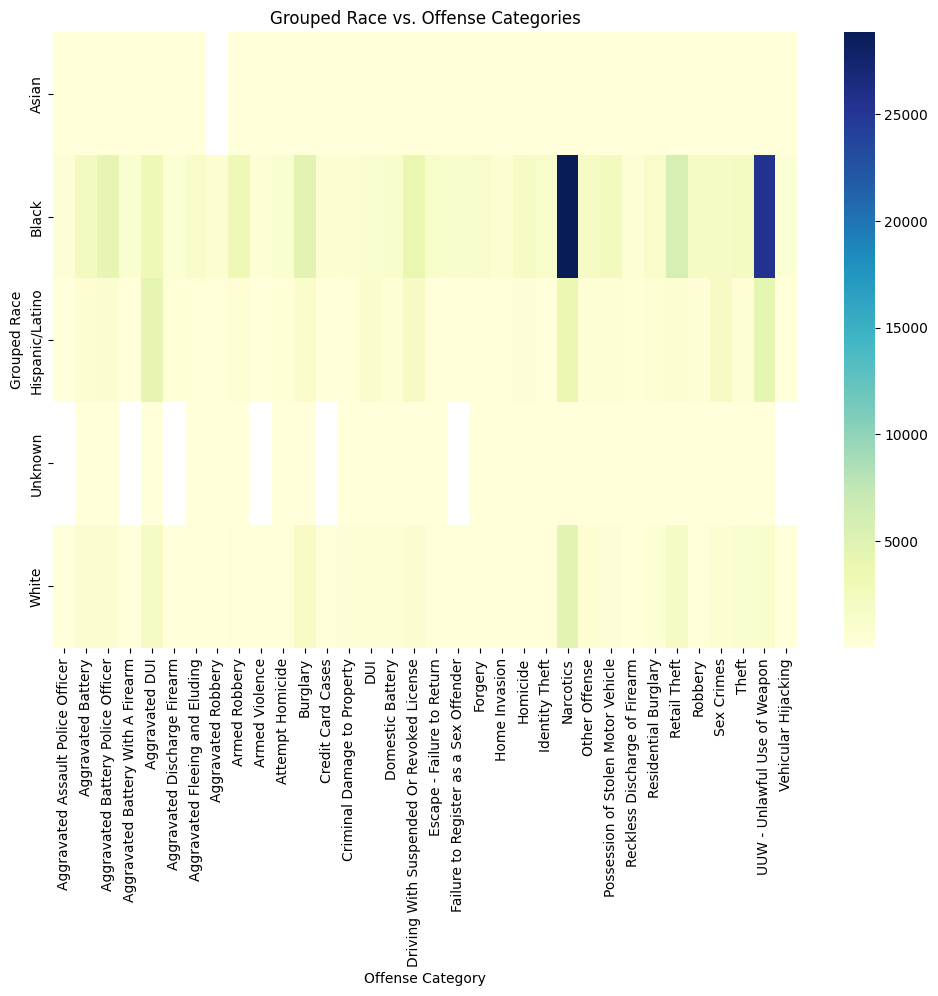

In [ ]:
# LG

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Race vs. Offense Categories Heatmap
plt.figure(figsize=(12, 8))
race_offense_ct = df.groupby(['Grouped_Race', 'OFFENSE_CATEGORY']).size().unstack()
race_offense_ct = race_offense_ct.loc[:, race_offense_ct.sum(axis=0) > 500]  # Filtering important offense categories
sns.heatmap(race_offense_ct, cmap="YlGnBu", annot=False)
plt.title('Grouped Race vs. Offense Categories')
plt.xlabel('Offense Category')
plt.ylabel('Grouped Race')
plt.show()

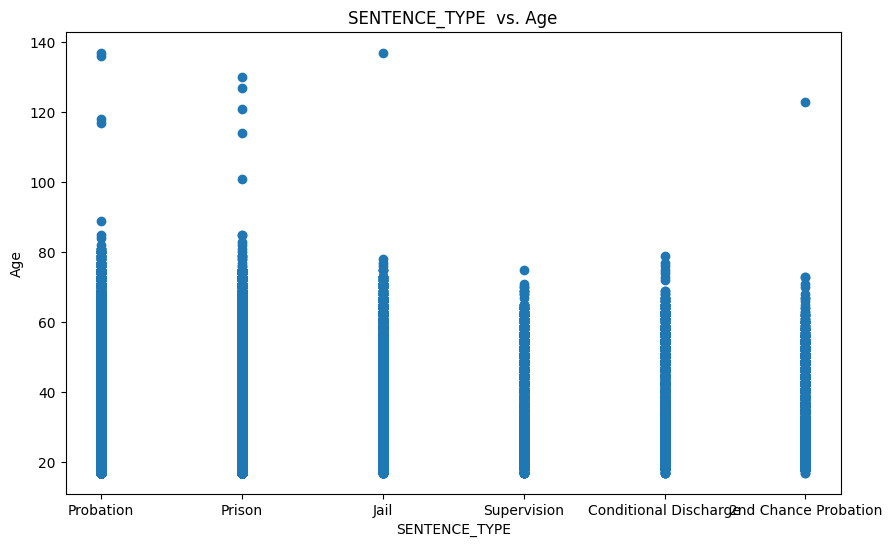

In [ ]:
import matplotlib.pyplot as plt

# Visualization 2: SENTENCE_TYPE  vs. Age Scatter Plot (using Matplotlib directly)
plt.figure(figsize=(10, 6))
plt.scatter(df['SENTENCE_TYPE'],df['AGE_AT_INCIDENT'])
plt.title('SENTENCE_TYPE  vs. Age')
plt.xlabel('SENTENCE_TYPE')
plt.ylabel('Age')
plt.show()

# LG

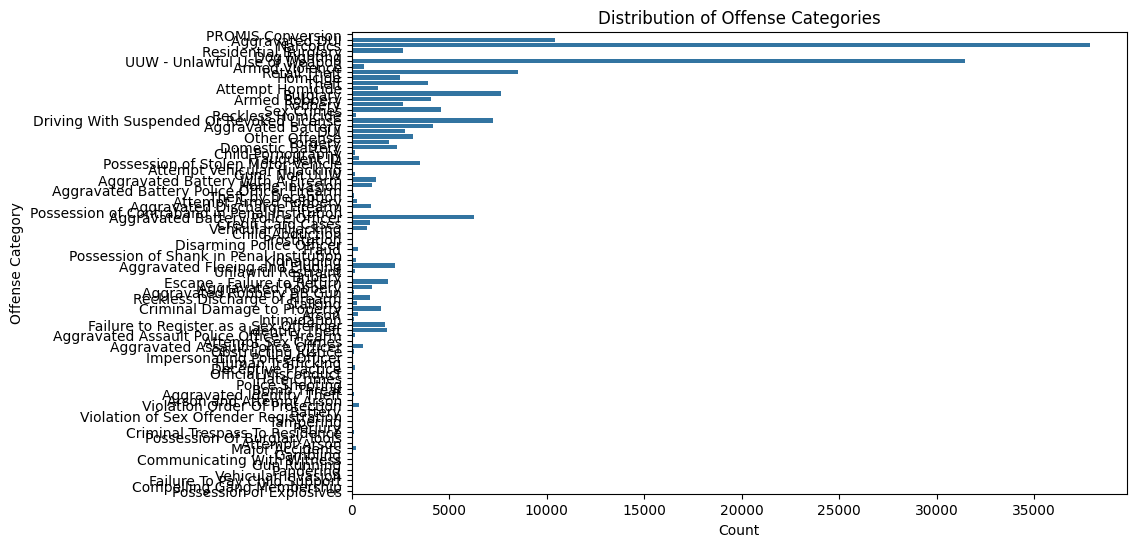

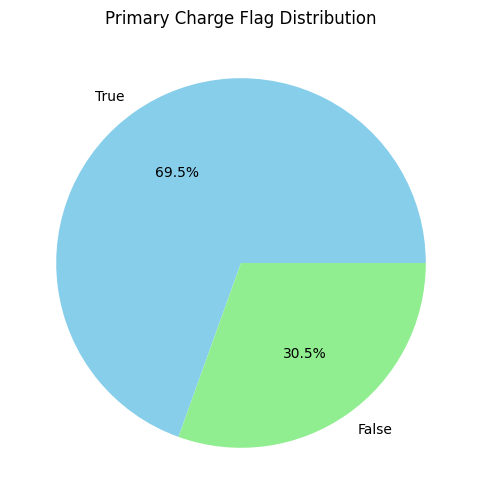

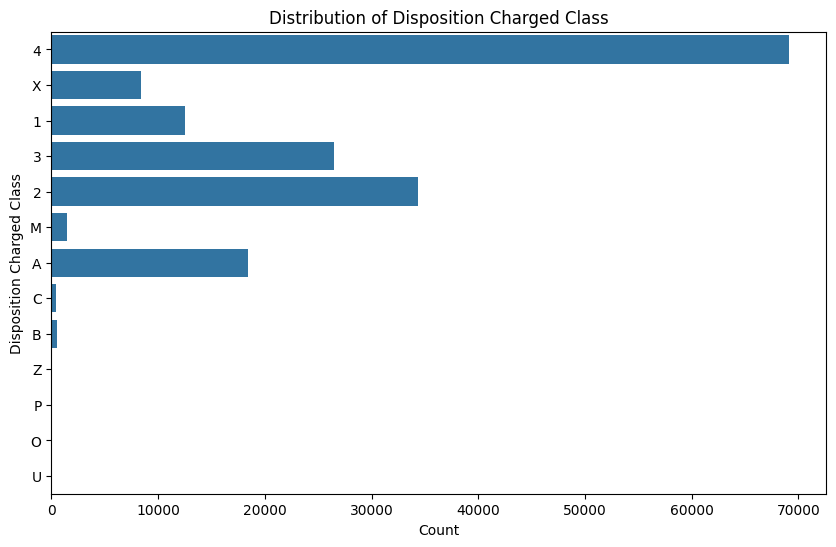

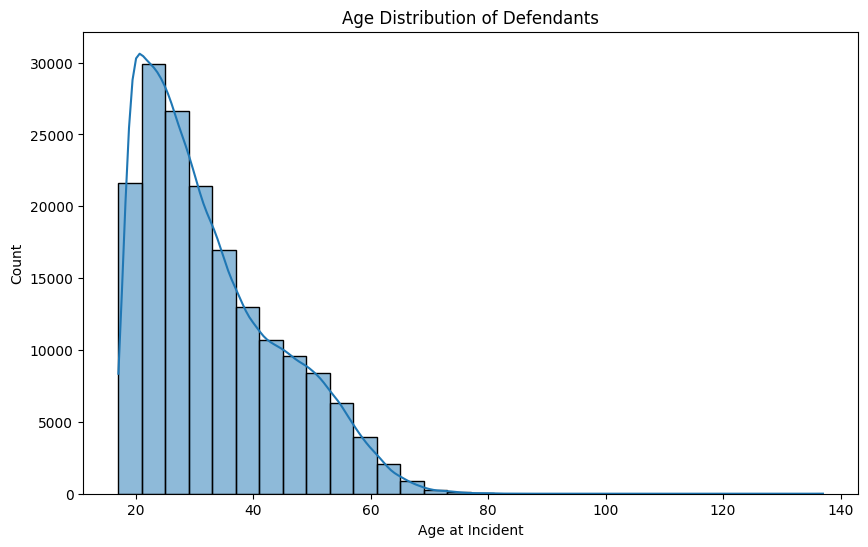

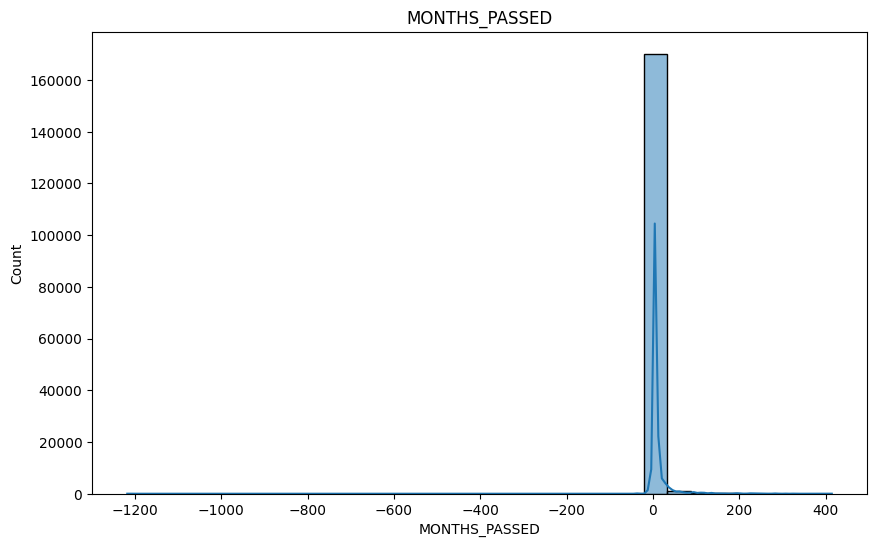

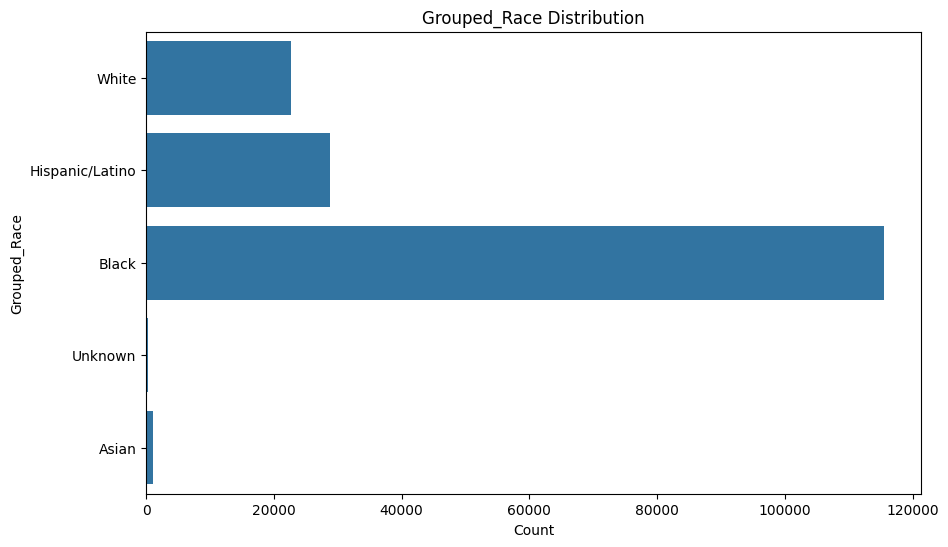

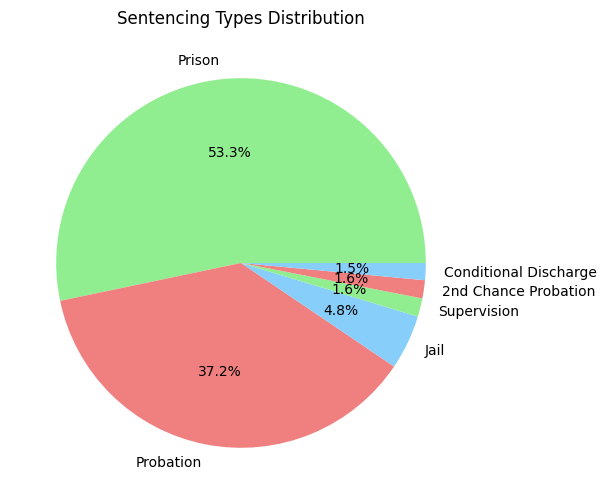

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Offense Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='OFFENSE_CATEGORY', data=df)
plt.title('Distribution of Offense Categories')
plt.xlabel('Count')
plt.ylabel('Offense Category')
plt.show()

# Visualization 2: Primary Charge Flag Distribution
plt.figure(figsize=(6, 6))
df['PRIMARY_CHARGE_FLAG'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Primary Charge Flag Distribution')
plt.ylabel('')
plt.show()

# Visualization 3: Distribution of Disposition Charged Class
plt.figure(figsize=(10, 6))
sns.countplot(y='DISPOSITION_CHARGED_CLASS', data=df)
plt.title('Distribution of Disposition Charged Class')
plt.xlabel('Count')
plt.ylabel('Disposition Charged Class')
plt.show()

# Visualization 4: Age Distribution of Defendants
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE_AT_INCIDENT'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Defendants')
plt.xlabel('Age at Incident')
plt.ylabel('Count')
plt.show()


# Visualization 6: Length of Case Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MONTHS_PASSED'].dropna(), bins=30, kde=True)
plt.title('MONTHS_PASSED')
plt.xlabel('MONTHS_PASSED')
plt.ylabel('Count')
plt.show()

# Visualization 7: Race Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Grouped_Race', data=df)
plt.title('Grouped_Race Distribution')
plt.xlabel('Count')
plt.ylabel('Grouped_Race')
plt.show()

# Visualization 8: Sentencing Types Distribution
plt.figure(figsize=(6, 6))
df['SENTENCE_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sentencing Types Distribution')
plt.ylabel('')
plt.show()

# LG

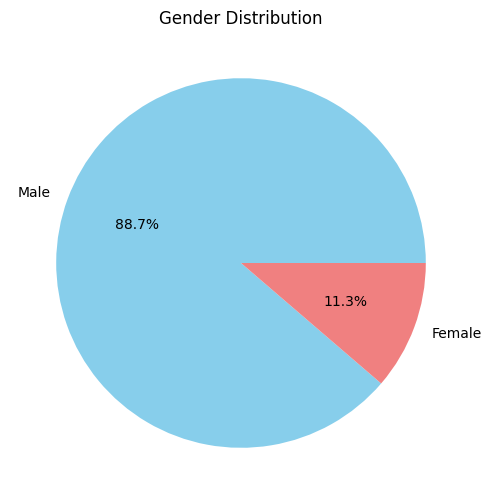

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows with 'Male' and 'Female' genders
df_gender = df[df['GENDER'].isin(['Male', 'Female'])]

# Count the occurrences of each gender
gender_counts = df_gender['GENDER'].value_counts()

# Create a pie chart for gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

#LG


<ipython-input-179-08e3737c2d92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes_men.values, y=top_10_crimes_men.index, ax=axes[0], palette='Blues_d')
<ipython-input-179-08e3737c2d92>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes_women.values, y=top_10_crimes_women.index, ax=axes[1], palette='Reds_d')


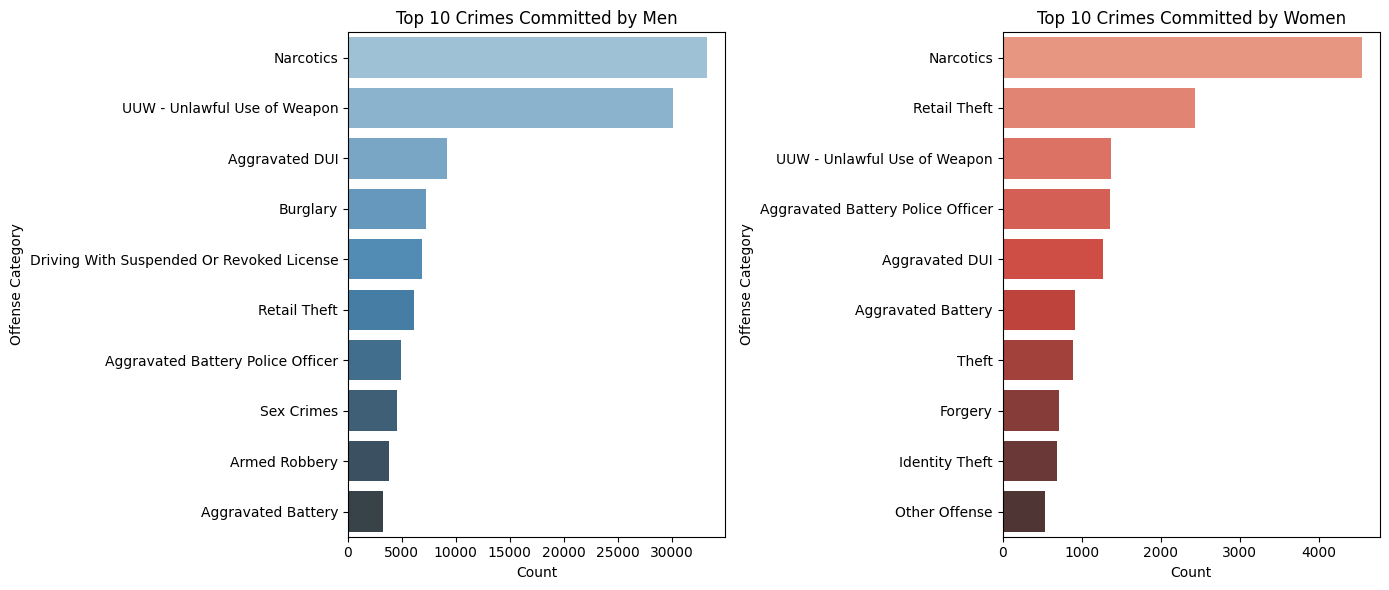

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows with 'Male' and 'Female' genders
df_gender = df[df['GENDER'].isin(['Male', 'Female'])]

# Identify the top 10 crimes for men
top_10_crimes_men = df_gender[df_gender['GENDER'] == 'Male']['OFFENSE_CATEGORY'].value_counts().head(10)

# Identify the top 10 crimes for women
top_10_crimes_women = df_gender[df_gender['GENDER'] == 'Female']['OFFENSE_CATEGORY'].value_counts().head(10)

# Create subplots for men and women
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for men
sns.barplot(x=top_10_crimes_men.values, y=top_10_crimes_men.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Crimes Committed by Men')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Offense Category')

# Plot for women
sns.barplot(x=top_10_crimes_women.values, y=top_10_crimes_women.index, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 10 Crimes Committed by Women')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Offense Category')

plt.tight_layout()
plt.show()

#LG


<ipython-input-180-6ebe137f7632>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, ax=axes[i//2, i%2], palette='viridis')
<ipython-input-180-6ebe137f7632>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, ax=axes[i//2, i%2], palette='viridis')
<ipython-input-180-6ebe137f7632>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, ax=axes[i//2, i%2], palette='viridis')
<ipython-input-180-6ebe137f7632>:22: FutureWar

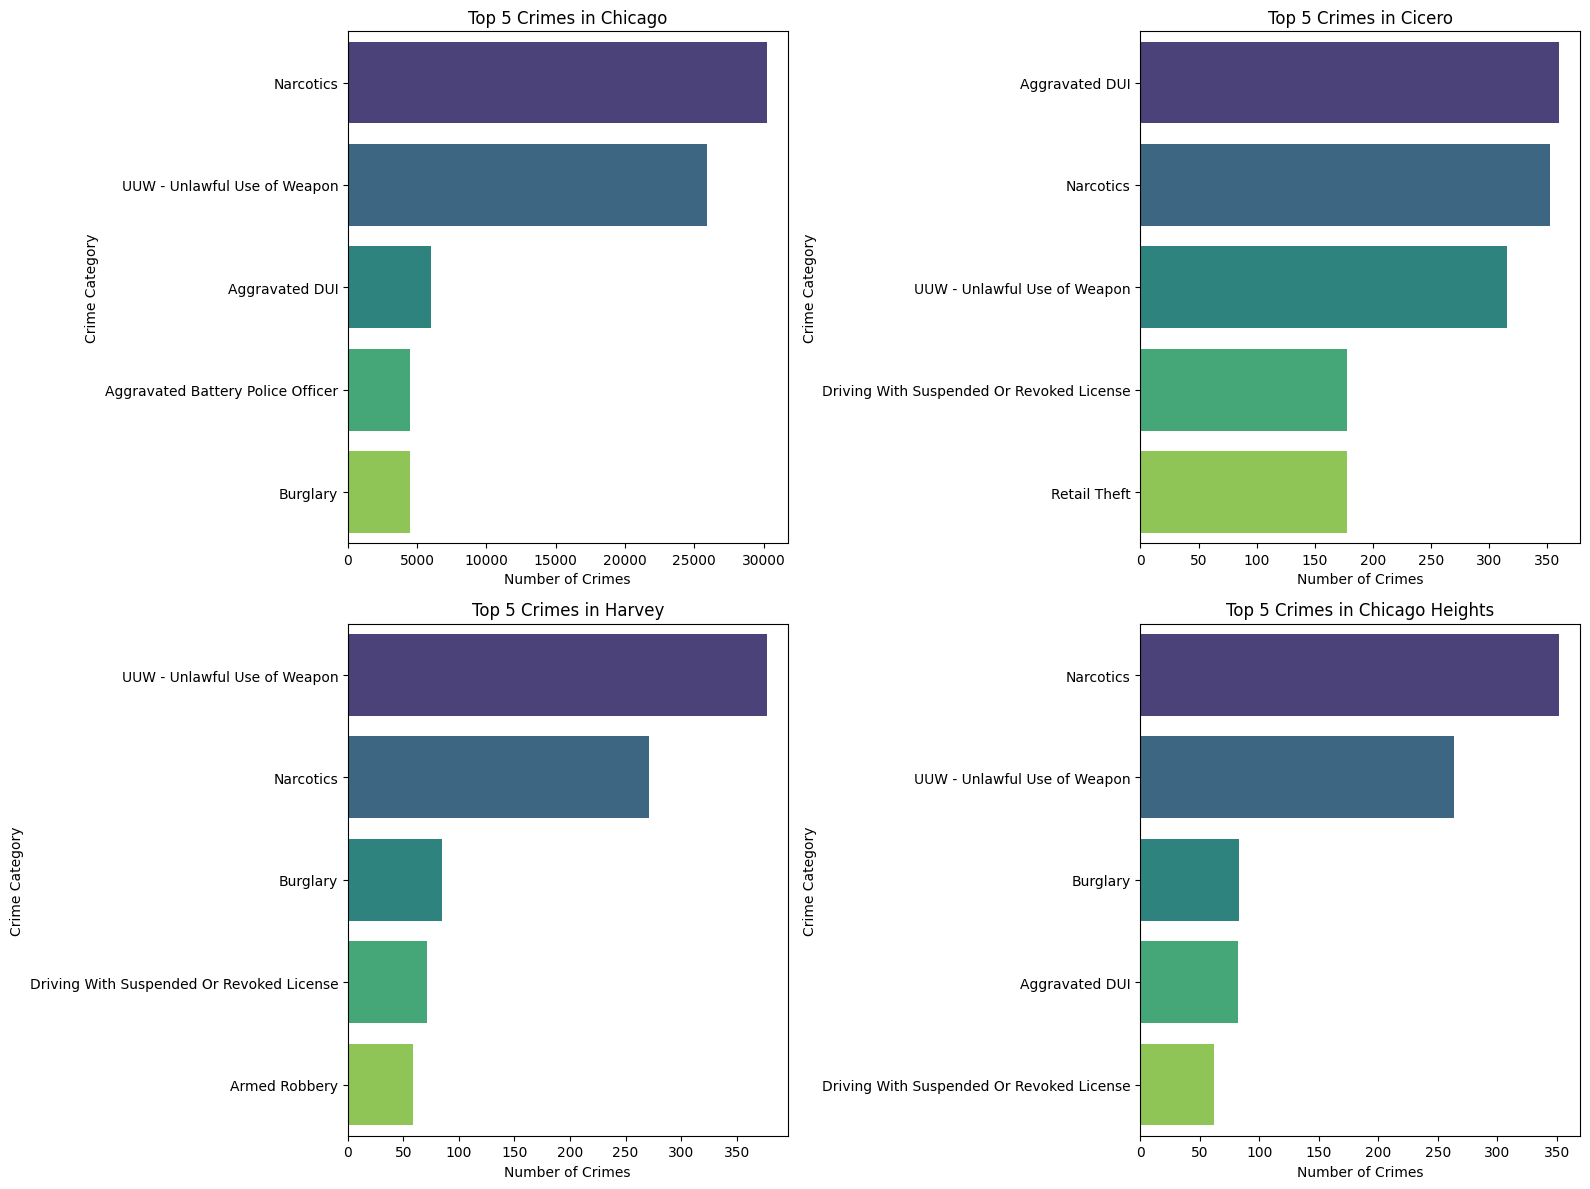

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the top 4 cities with the highest number of crimes
top_4_cities = df['INCIDENT_CITY'].value_counts().head(4).index.tolist()

# Step 2: Filter the dataset to include only rows corresponding to the top 4 cities
df_top_4_cities = df[df['INCIDENT_CITY'].isin(top_4_cities)]

# Step 3: Create subplots for each city
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Step 4: Plot top 5 crimes for each city
for i, city in enumerate(top_4_cities):
    # Filter data for the current city
    df_city = df_top_4_cities[df_top_4_cities['INCIDENT_CITY'] == city]

    # Count occurrences of each crime category
    crime_counts = df_city['OFFENSE_CATEGORY'].value_counts().head(5)

    # Plot bar chart for current city
    sns.barplot(x=crime_counts.values, y=crime_counts.index, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f'Top 5 Crimes in {city}')
    axes[i//2, i%2].set_xlabel('Number of Crimes')
    axes[i//2, i%2].set_ylabel('Crime Category')

plt.tight_layout()
plt.show()

# LG

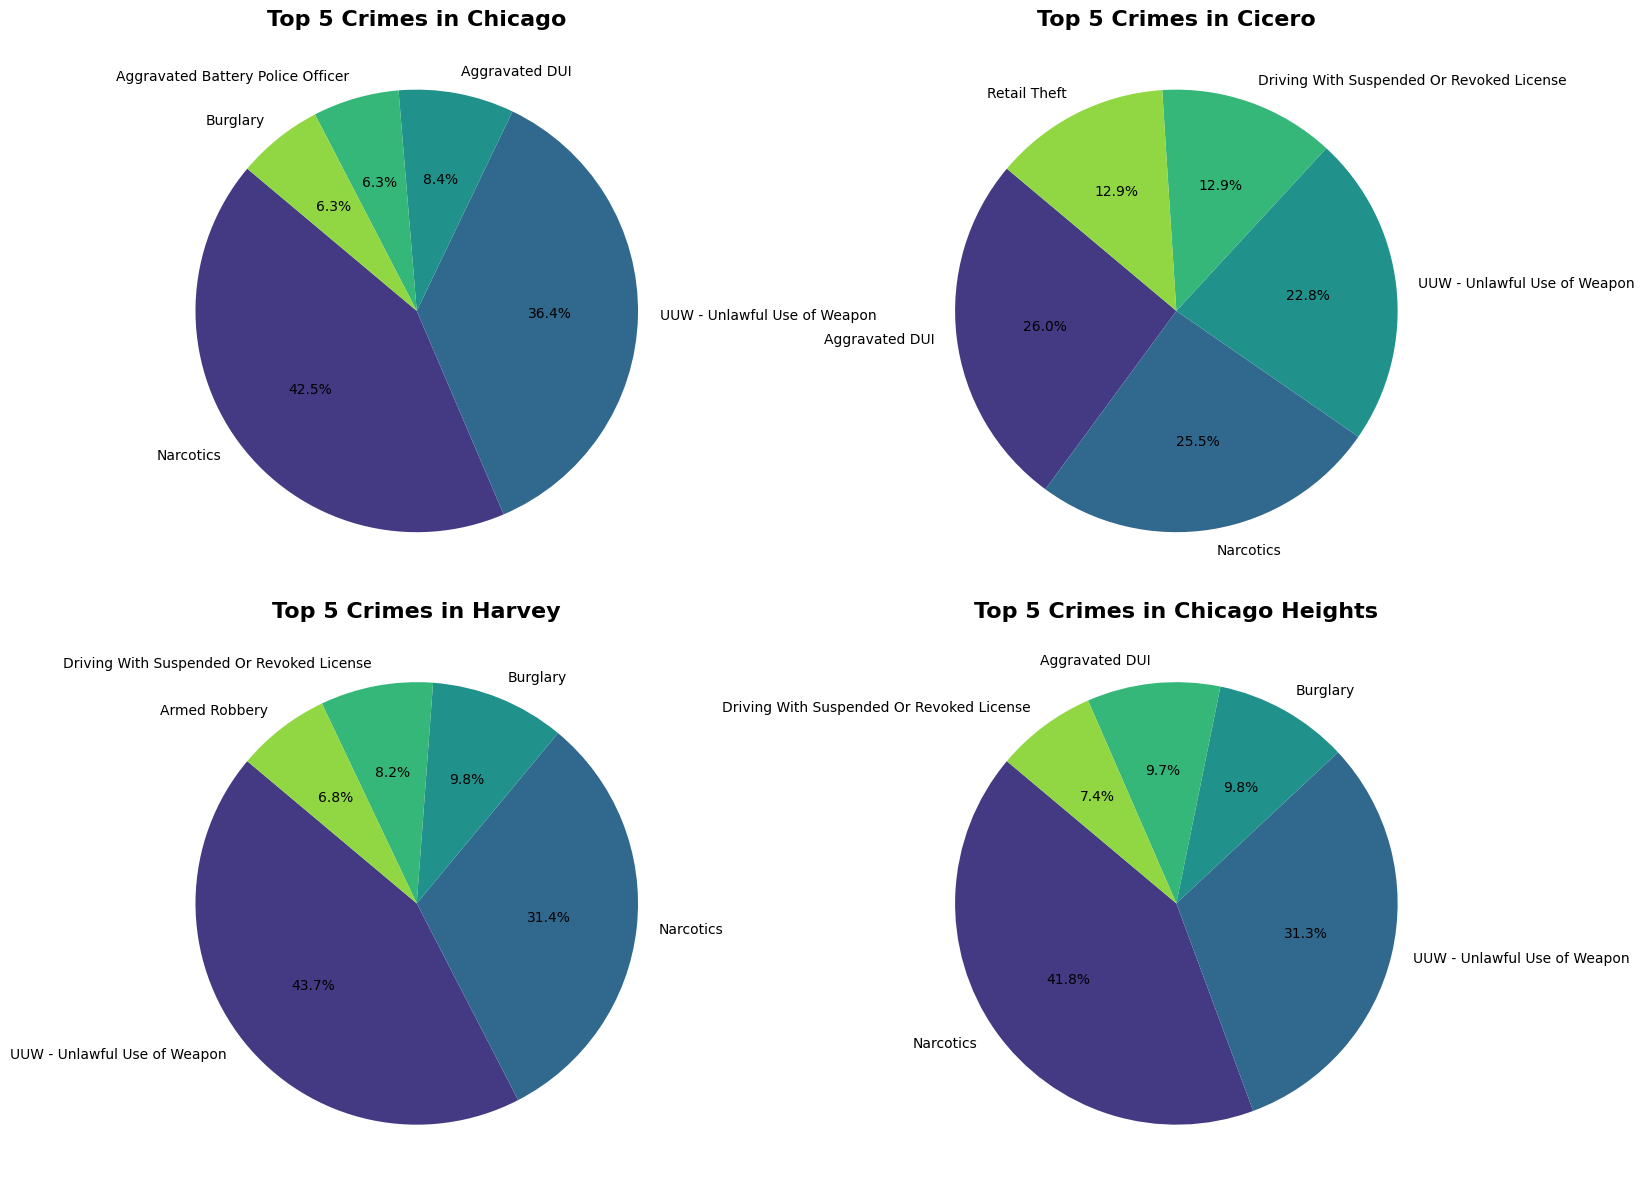

In [ ]:
# LG
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the top 4 cities with the highest number of crimes
top_4_cities = df['INCIDENT_CITY'].value_counts().head(4).index.tolist()

# Step 2: Filter the dataset to include only rows corresponding to the top 4 cities
df_top_4_cities = df[df['INCIDENT_CITY'].isin(top_4_cities)]

# Step 3: Create subplots for each city
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Step 4: Plot top 5 crimes for each city as pie charts
for i, city in enumerate(top_4_cities):
    # Filter data for the current city
    df_city = df_top_4_cities[df_top_4_cities['INCIDENT_CITY'] == city]

    # Count occurrences of each crime category
    crime_counts = df_city['OFFENSE_CATEGORY'].value_counts().head(5)

    # Plot pie chart for current city
    axes[i//2, i%2].pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(crime_counts)))
    axes[i//2, i%2].set_title(f'Top 5 Crimes in {city}', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#LG


<ipython-input-182-67d29eaf7d52>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.values, y=top_5_cities.index, palette='viridis')


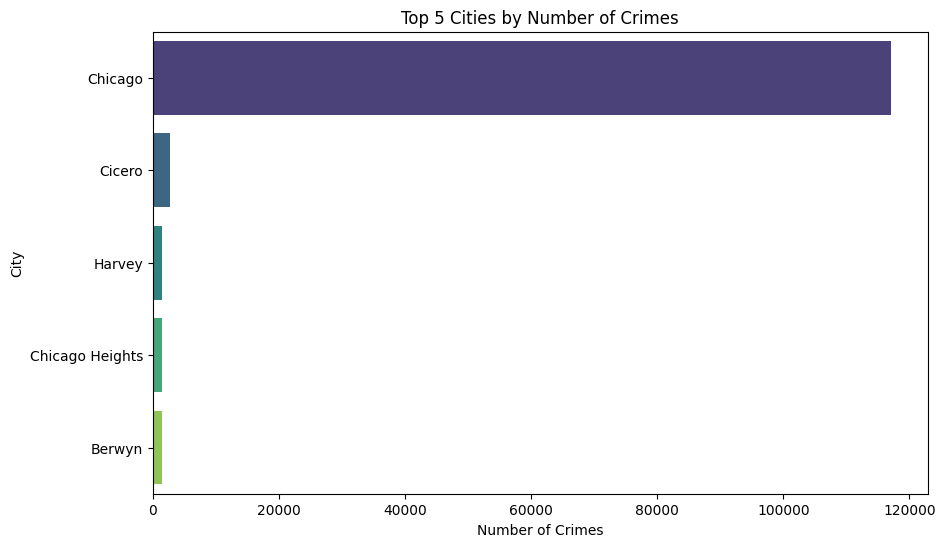

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 5 cities with the highest number of crimes
top_5_cities = df['INCIDENT_CITY'].value_counts().head(5)

# Plot the number of crimes committed in each city
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.values, y=top_5_cities.index, palette='viridis')
plt.title('Top 5 Cities by Number of Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('City')
plt.show()

#LG


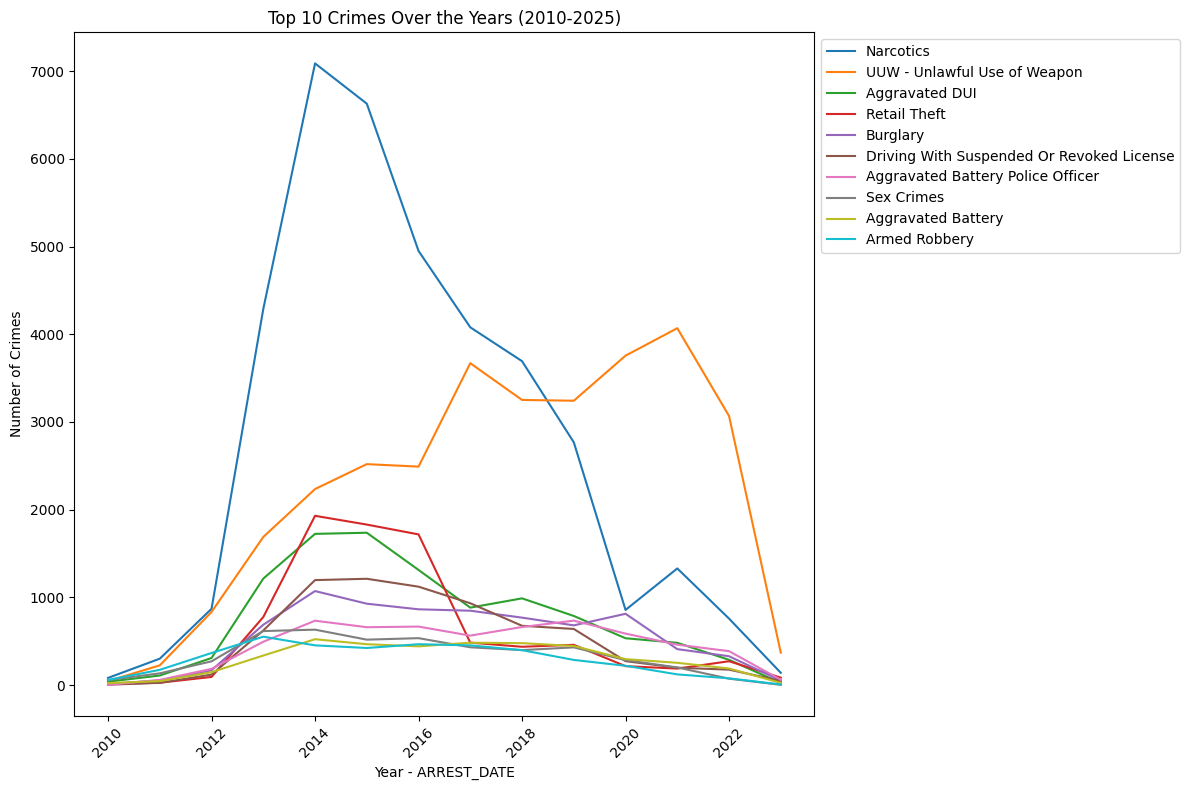

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out invalid dates
df_valid_dates = df[df['ARREST_DATE'].notnull()]

# Convert the ARREST_DATE column to datetime
df_valid_dates['ARREST_DATE'] = pd.to_datetime(df_valid_dates['ARREST_DATE'], errors='coerce')

# Filter out rows with NaT (Not a Time) values
df_valid_dates = df_valid_dates[df_valid_dates['ARREST_DATE'].notnull()]

# Filter the dataset to include only years between 2010 and 2025
df_filtered_years = df_valid_dates[(df_valid_dates['ARREST_DATE'].dt.year >= 2010) & (df_valid_dates['ARREST_DATE'].dt.year <= 2025)]

# Identify the top 10 crimes with the highest number of occurrences
top_10_crimes = df_filtered_years['OFFENSE_CATEGORY'].value_counts().head(10).index.tolist()

# Filter the dataset to include only rows corresponding to the top 10 crimes
df_top_10_crimes = df_filtered_years[df_filtered_years['OFFENSE_CATEGORY'].isin(top_10_crimes)]

# Group the data by year and crime category, and aggregate the counts
crime_counts_by_year = df_top_10_crimes.groupby([df_top_10_crimes['ARREST_DATE'].dt.year, 'OFFENSE_CATEGORY']).size().unstack()

# Plot a line chart for each crime category
plt.figure(figsize=(12, 8))
for crime in top_10_crimes:
    plt.plot(crime_counts_by_year.index, crime_counts_by_year[crime], label=crime)

plt.title('Top 10 Crimes Over the Years (2010-2025)')
plt.xlabel('Year - ARREST_DATE')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

 #LG


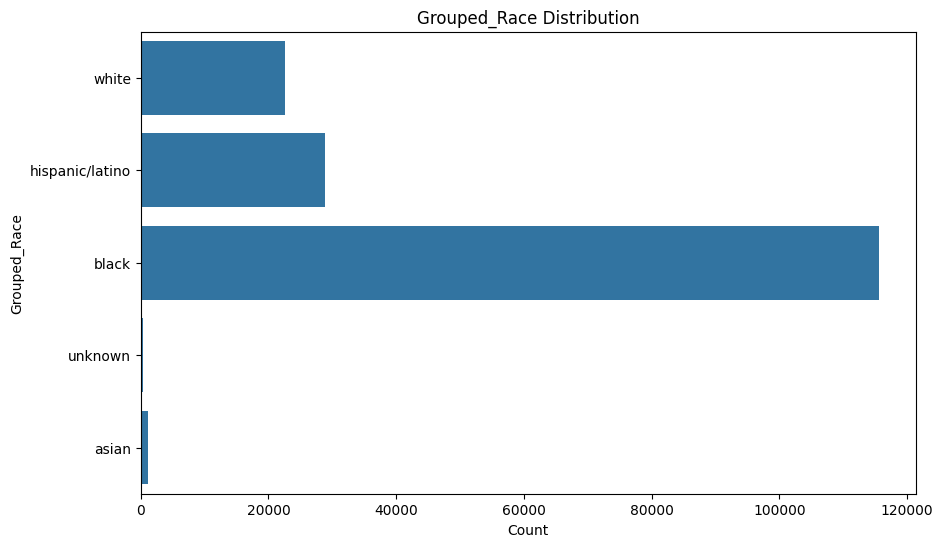

In [ ]:
df['Grouped_Race'] = df['Grouped_Race'].str.lower()
# Visualization 7: Race Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Grouped_Race', data=df)
plt.title('Grouped_Race Distribution')
plt.xlabel('Count')
plt.ylabel('Grouped_Race')
plt.show()

# LG

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

In [ ]:
# # Create a mask where values are greater than 0
# mask = cross_tab > 100

# # Create a custom color palette
# custom_palette = sns.color_palette("flare", as_cmap=True)  # "flare" is the name of the color palette

# # Create a heatmap with the custom color palette and the mask applied
# plt.figure(figsize=(12, 8))
# sns.heatmap(cross_tab, cmap=custom_palette, annot=False, mask=~mask)
# plt.xlabel('Sentence Type')
# plt.ylabel('Offense Category')
# plt.title('Count of Sentence Type by Offense Category')
# plt.show()

# # NG

In [ ]:
# # Create a grouped bar plot
# plt.figure(figsize=(12, 8))
# for col in count_df.columns:
#     plt.bar(count_df.index, count_df[col], label=col)

# plt.title('Count of Sentence Type by Top 10 Offense Categories (COMMITMENT_TERM > 0)')
# plt.xlabel('Offense Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Sentence Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # NG

## Model

In [ ]:
df.columns

Index(['OFFENSE_CATEGORY', 'PRIMARY_CHARGE_FLAG', 'CHARGE_COUNT',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'DISPOSITION_CHARGED_CHAPTER',
       'DISPOSITION_CHARGED_ACT', 'DISPOSITION_CHARGED_SECTION',
       'DISPOSITION_CHARGED_CLASS', 'AGE_AT_INCIDENT', 'GENDER',
       'INCIDENT_CITY', 'LAW_ENFORCEMENT_AGENCY', 'SENTENCE_TYPE',
       'INCIDENT_BEGIN_DATE', 'ARREST_DATE', 'MONTHS_PASSED',
       'INCIDENT_TIME_CATEGORY', 'CrimeType', 'Grouped_Race'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

In [ ]:
# Change object to string for object type columns

object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('string')

# DS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  string        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  string        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  string        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  string        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  string        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  string        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  string        
 10  INCIDENT_CITY    

In [ ]:
'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# categorical encoding
label_encoders = {}
for column in df.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# TT Split
X = df.drop('SENTENCE_TYPE', axis=1)  # Features
y = df['SENTENCE_TYPE']  # Target

# encode 'SENTENCE_TYPE' column
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
'''

"\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import accuracy_score\n\n# categorical encoding\nlabel_encoders = {}\nfor column in df.select_dtypes(include=['category', 'object']).columns:\n    label_encoders[column] = LabelEncoder()\n    df[column] = label_encoders[column].fit_transform(df[column])\n\n# TT Split\nX = df.drop('SENTENCE_TYPE', axis=1)  # Features\ny = df['SENTENCE_TYPE']  # Target\n\n# encode 'SENTENCE_TYPE' column\nlabel_encoder_y = LabelEncoder()\ny_encoded = label_encoder_y.fit_transform(y)\n"

In [ ]:
'''

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Multinomial Naive Bayes classifier
model = MultinomialNB()

# fit
model.fit(X_train, y_train)

# predict probs
probabilities = model.predict_proba(X_test)

# pred = highest probability
y_pred = model.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# DS

'''

'\n\nX_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)\n\n# Multinomial Naive Bayes classifier\nmodel = MultinomialNB()\n\n# fit\nmodel.fit(X_train, y_train)\n\n# predict probs\nprobabilities = model.predict_proba(X_test)\n\n# pred = highest probability\ny_pred = model.predict(X_test)\n\n# Eval\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Model Accuracy: {accuracy * 100:.2f}%")\n\n# DS\n\n'

In [ ]:
'''
# get the prob of each class for a new data point
new_data = X_test.iloc[0].to_numpy().reshape(1, -1)  # Example new data point
new_data_probabilities = model.predict_proba(new_data)
print("Probabilities for each class:", new_data_probabilities)

'''

'\n# get the prob of each class for a new data point\nnew_data = X_test.iloc[0].to_numpy().reshape(1, -1)  # Example new data point\nnew_data_probabilities = model.predict_proba(new_data)\nprint("Probabilities for each class:", new_data_probabilities)\n\n'

In [ ]:

'''
# Categorical encoding
label_encoders = {}
for column in df.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# TT Split
X = df.drop('SENTENCE_TYPE', axis=1)  # Features
y = df['SENTENCE_TYPE']  # Target

# Encode SENTENCE_TYPE
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Get class labels for 'SENTENCE_TYPE'
class_labels = label_encoder_y.classes_

# TTSPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Multinomial Naive Bayes classifier
model = MultinomialNB()

model.fit(X_train, y_train)

probabilities = model.predict_proba(X_test)

# DF with probabilities
prob_df = pd.DataFrame(probabilities, columns=[f'PROB_{label}' for label in class_labels])

# combine original X_test with the new probabilities DataFrame
X_test_combined = X_test.reset_index(drop=True).join(prob_df)

# X_test_combined has original features along with a column for the predicted probability of each outcome
print(X_test_combined.head())


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

#DS
'''

'\n# Categorical encoding\nlabel_encoders = {}\nfor column in df.select_dtypes(include=[\'category\', \'object\']).columns:\n    label_encoders[column] = LabelEncoder()\n    df[column] = label_encoders[column].fit_transform(df[column])\n\n# TT Split\nX = df.drop(\'SENTENCE_TYPE\', axis=1)  # Features\ny = df[\'SENTENCE_TYPE\']  # Target\n\n# Encode SENTENCE_TYPE\nlabel_encoder_y = LabelEncoder()\ny_encoded = label_encoder_y.fit_transform(y)\n\n# Get class labels for \'SENTENCE_TYPE\'\nclass_labels = label_encoder_y.classes_\n\n# TTSPLIT\nX_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)\n\n#  Multinomial Naive Bayes classifier\nmodel = MultinomialNB()\n\nmodel.fit(X_train, y_train)\n\nprobabilities = model.predict_proba(X_test)\n\n# DF with probabilities\nprob_df = pd.DataFrame(probabilities, columns=[f\'PROB_{label}\' for label in class_labels])\n\n# combine original X_test with the new probabilities DataFrame\nX_test_combined = X_test.r

In [ ]:
'''

label_encoders = {}
for column in df.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


X = df.drop('SENTENCE_TYPE', axis=1)  # Features
y = df['SENTENCE_TYPE']  # Target


label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
classes = label_encoder_y.classes_  # Get the unique classes for 'Sentence_Type'

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


model = MultinomialNB()

model.fit(X_train, y_train)


probabilities = model.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=[f'PROB_{cls}' for cls in classes])

# Concatenate the probabilities DataFrame with the original test set
# Reset index on X_test to match the index of probabilities_df
X_test.reset_index(drop=True, inplace=True)
df_with_probabilities = pd.concat([X_test, probabilities_df], axis=1)


print(df_with_probabilities.head())


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


#DS
'''

'\n\nlabel_encoders = {}\nfor column in df.select_dtypes(include=[\'category\', \'object\']).columns:\n    label_encoders[column] = LabelEncoder()\n    df[column] = label_encoders[column].fit_transform(df[column])\n\n\nX = df.drop(\'SENTENCE_TYPE\', axis=1)  # Features\ny = df[\'SENTENCE_TYPE\']  # Target\n\n\nlabel_encoder_y = LabelEncoder()\ny_encoded = label_encoder_y.fit_transform(y)\nclasses = label_encoder_y.classes_  # Get the unique classes for \'Sentence_Type\'\n\nX_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)\n\n\nmodel = MultinomialNB()\n\nmodel.fit(X_train, y_train)\n\n\nprobabilities = model.predict_proba(X_test)\nprobabilities_df = pd.DataFrame(probabilities, columns=[f\'PROB_{cls}\' for cls in classes])\n\n# Concatenate the probabilities DataFrame with the original test set\n# Reset index on X_test to match the index of probabilities_df\nX_test.reset_index(drop=True, inplace=True)\ndf_with_probabilities = pd.concat([X_te

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  string        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  bool          
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  string        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  string        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  string        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  string        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  string        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  string        
 10  INCIDENT_CITY    

LightGBM, short for light gradient-boosting machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

accuracy_score
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

train_test_split() function from the sklearn.model_selection module is used to split the dataset into training and validation sets.

The stratify=y parameter ensures that the class distribution is preserved in both the training and validation sets based on the target variable y.

test_size=0.2 specifies that 20% of the data will be allocated to the validation set.

random_state=42 sets the random seed for reproducibility.

Alternatively, LightGBM allows specifying class weights during model training to handle class imbalance.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score



#  features and target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# convert ALL categorical features to string to avoid mixed type issues
for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



# lgbm model with pipeline
# this uses the default
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


# DS

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Accuracy: 0.6845612197392924
Recall: 0.6845612197392924
Precision: 0.6728672993159664


In [ ]:
X_train.head(3)

,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_COUNT,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,AGE_AT_INCIDENT,GENDER,INCIDENT_CITY,LAW_ENFORCEMENT_AGENCY,INCIDENT_BEGIN_DATE,ARREST_DATE,MONTHS_PASSED,INCIDENT_TIME_CATEGORY,CrimeType,Grouped_Race
205911,Aggravated DUI,False,6,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,625,5,11-501(a),4,44.0,Male,Calumet City,CALUMET CITY PD,2016-10-03,2017-05-01 16:48:00,7.0,Day,Drug and Alcohol Related,black
274371,UUW - Unlawful Use of Weapon,True,1,OBSTRUCT JUST/DESTROY EVIDENCE,720,5,31-4(a)(1),4,29.0,Male,Chicago,CHICAGO PD,2021-07-25,2021-07-25 20:45:00,0.0,Night,Weapons Offenses,black
193961,Aggravated Battery With A Firearm,False,7,AGG UUW/LOADED/NO FCCA/FOID,720,5,24-1.6(a)(1),4,26.0,Male,Chicago,CHICAGO PD,2016-10-16,2016-10-16 13:17:00,0.0,Day,Violent Crimes,black


In [ ]:
categorical_features

['OFFENSE_CATEGORY',
 'PRIMARY_CHARGE_FLAG',
 'DISPOSITION_CHARGED_OFFENSE_TITLE',
 'DISPOSITION_CHARGED_CHAPTER',
 'DISPOSITION_CHARGED_ACT',
 'DISPOSITION_CHARGED_SECTION',
 'DISPOSITION_CHARGED_CLASS',
 'GENDER',
 'INCIDENT_CITY',
 'LAW_ENFORCEMENT_AGENCY',
 'INCIDENT_TIME_CATEGORY',
 'CrimeType',
 'Grouped_Race']

In [ ]:
numerical_features

['CHARGE_COUNT', 'AGE_AT_INCIDENT', 'MONTHS_PASSED']

In [ ]:
y_test

118918       Prison
207825    Probation
107752       Prison
183211    Probation
243744    Probation
            ...    
145033    Probation
244150       Prison
287755         Jail
144896       Prison
190639       Prison
Name: SENTENCE_TYPE, Length: 34368, dtype: string

In [ ]:
y_pred

array(['Prison', 'Probation', 'Prison', ..., 'Supervision', 'Prison',
       'Probation'], dtype=object)

In [ ]:
prob_df

,2nd Chance Probation,Conditional Discharge,Jail,Prison,Probation,Supervision,predicted_class
0,0.000595,0.000386,0.015985,0.755006,0.227799,0.000229,Prison
1,0.116400,0.027042,0.008925,0.308603,0.537426,0.001603,Probation
2,0.000144,0.000082,0.006178,0.992281,0.001240,0.000076,Prison
3,0.000499,0.001519,0.015727,0.634976,0.346008,0.001271,Prison
4,0.262245,0.002998,0.010606,0.159350,0.531479,0.033321,Probation
...,...,...,...,...,...,...,...
34363,0.029182,0.001982,0.006957,0.467894,0.492602,0.001382,Probation
34364,0.001284,0.000673,0.005435,0.740083,0.251531,0.000994,Prison
34365,0.017103,0.027220,0.104200,0.008010,0.129559,0.713908,Supervision
34366,0.000747,0.000407,0.015994,0.689526,0.293079,0.000247,Prison


In [ ]:
df['SENTENCE_TYPE'].value_counts()

Prison                   91571
Probation                64007
Jail                      8208
Supervision               2772
2nd Chance Probation      2722
Conditional Discharge     2558
Name: SENTENCE_TYPE, dtype: Int64

In [ ]:
# this one has highest accuracy score for LGB

start_time = time.time()



#  features and target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# # LGBM with pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=31,               # Default is 31. Increase for more complexity, decrease for less.
        max_depth=-1,                # Default is -1. Use positive value to limit depth of tree.
        learning_rate=0.1,           # Default is 0.1. Lower value for slow, but potentially better learning.
        n_estimators=100,            # Default is 100. Increase for more boosting rounds.
        subsample=0.8,               # Default is 1. Use <1.0 to use a fraction of samples.
        reg_alpha=0.0,               # Default is 0. L1 regularization. Increase to make model more conservative.
        reg_lambda=0.0               # Default is 0. L2 regularization. Increase to make model more conservative.
    ))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time


hours, minutes, seconds = convert_seconds(elapsed_time)

if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")

# DS


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Accuracy: 0.6845612197392924
Recall: 0.6845612197392924
Precision: 0.6728672993159664
The code took 18.22 seconds to run


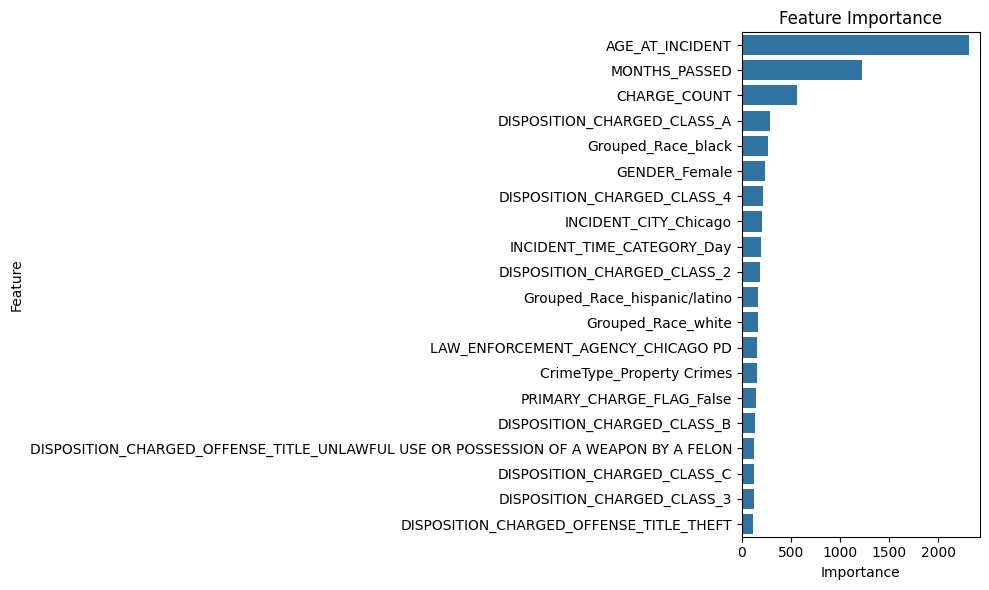

In [ ]:
# FEATURE IMPORTANCE!!
feature_importances = clf.named_steps['classifier'].feature_importances_

# get feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# combine numerical & categorical feature names
all_feature_names = numerical_features + list(feature_names)

# df for feature importances
df_feature_importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_feature_importances.head(20))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
df_feature_importances

,feature,importance
1,AGE_AT_INCIDENT,2307
2,MONTHS_PASSED,1221
0,CHARGE_COUNT,565
2153,DISPOSITION_CHARGED_CLASS_A,283
2626,Grouped_Race_black,266
...,...,...
514,DISPOSITION_CHARGED_OFFENSE_TITLE_DRVG REVOKED...,0
515,DISPOSITION_CHARGED_OFFENSE_TITLE_DRVG UNDER I...,0
1308,DISPOSITION_CHARGED_SECTION_12-3.05(b)(1),0
1307,DISPOSITION_CHARGED_SECTION_12-3.05(a)(5),0


In [ ]:
# Start timing
start_time = time.time()

### This time decrease the learning_rate to 0.05 and compare



import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




#  features and target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Convert all categorical features to string to avoid mixed type issues
for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=31,               # Default is 31. Increase for more complexity, decrease for less.
        max_depth=-1,                # Default is -1. Use positive value to limit depth of tree.
        learning_rate=0.05,           # Default is 0.1. Lower value for slow, but potentially better learning.
        n_estimators=100,            # Default is 100. Increase for more boosting rounds.
        subsample=0.8,               # Default is 1. Use <1.0 to use a fraction of samples.
        reg_alpha=0.0,               # Default is 0. L1 regularization. Increase to make model more conservative.
        reg_lambda=0.0               # Default is 0. L2 regularization. Increase to make model more conservative.
    ))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Accuracy: 0.6820006983240223
Recall: 0.6820006983240223
Precision: 0.6711634159766419
The code took 18.92 seconds to run


In [ ]:
# Start timing
start_time = time.time()

### Adjust the number of leaves



import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




#  features and target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Convert all categorical features to string to avoid mixed type issues
for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=40,               # Default is 31. Increase for more complexity, decrease for less.
        max_depth=-1,                # Default is -1. Use positive value to limit depth of tree.
        learning_rate=0.05,           # Default is 0.1. Lower value for slow, but potentially better learning.
        n_estimators=100,            # Default is 100. Increase for more boosting rounds.
        subsample=0.8,               # Default is 1. Use <1.0 to use a fraction of samples.
        reg_alpha=0.0,               # Default is 0. L1 regularization. Increase to make model more conservative.
        reg_lambda=0.0               # Default is 0. L2 regularization. Increase to make model more conservative.
    ))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Accuracy: 0.6832809590316573
Recall: 0.6832809590316573
Precision: 0.672741983527858
The code took 21.53 seconds to run


In [ ]:
# Start timing
start_time = time.time()

### Adjust number of leaves and learning_rate - lower accuracy



import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




#  features and target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Convert all categorical features to string to avoid mixed type issues
for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=35,               # Default is 31. Increase for more complexity, decrease for less.
        max_depth=-1,                # Default is -1. Use positive value to limit depth of tree.
        learning_rate=0.001,           # Default is 0.1. Lower value for slow, but potentially better learning.
        n_estimators=100,            # Default is 100. Increase for more boosting rounds.
        subsample=0.8,               # Default is 1. Use <1.0 to use a fraction of samples.
        reg_alpha=0.0,               # Default is 0. L1 regularization. Increase to make model more conservative.
        reg_lambda=0.0               # Default is 0. L2 regularization. Increase to make model more conservative.
    ))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Accuracy: 0.5328794227188082
Recall: 0.5328794227188082
Precision: 0.2839604791571303
The code took 17.06 seconds to run


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # lower accuracy

# # Start timing
# start_time = time.time()

# ### Adjust number of leaves and learning_rate - lower accuracy



# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score




# #  features and target
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# categorical_features = X.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.tolist()
# numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# # Convert all categorical features to string to avoid mixed type issues
# for col in categorical_features:
#     df[col] = df[col].astype(str)



# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']


# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define LightGBM model within pipeline
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb.LGBMClassifier(
#         num_leaves=35,               # Default is 31. Increase for more complexity, decrease for less.
#         max_depth=-1,                # Default is -1. Use positive value to limit depth of tree.
#         learning_rate=0.0001,           # Default is 0.1. Lower value for slow, but potentially better learning.
#         n_estimators=100,            # Default is 100. Increase for more boosting rounds.
#         subsample=0.8,               # Default is 1. Use <1.0 to use a fraction of samples.
#         reg_alpha=0.0,               # Default is 0. L1 regularization. Increase to make model more conservative.
#         reg_lambda=0.0               # Default is 0. L2 regularization. Increase to make model more conservative.
#     ))])


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# probabilities = clf.predict_proba(X_test)

# # df for probabilities
# prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
# prob_df['predicted_class'] = y_pred

# # eval model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.4f}")



# #### TIMING LOGIC ↓
# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken in appropriate format
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 933
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
Model Accuracy: 0.5329
The code took 18.01 seconds to run


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  object        
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

To perform stratified cross-validation in scikit-learn, use the StratifiedKFold or StratifiedShuffleSplit classes, which ensure that each fold or split preserves the same class distribution as the original dataset.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
import numpy as np

# Define categorical and numerical features as before
categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert all categorical features to string to avoid mixed type issues
df[categorical_features] = df[categorical_features].astype(str)

# Define your features and target variable
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=32,
        max_depth=-1,
        learning_rate=0.001,
        n_estimators=100,
        subsample=0.8,
        reg_alpha=0.0,
        reg_lambda=0.0
    ))
])

# Define custom scoring functions for recall and precision
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0)  # Set zero_division=0 to ignore warning
}

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring=scoring)

# Extract scores for each metric
cv_accuracy_scores = cv_results['test_accuracy']
cv_recall_scores = cv_results['test_recall']
cv_precision_scores = cv_results['test_precision']

# Print cross-validation results
print(f"CV Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy_scores):.4f}")

print(f"CV Recall Scores: {cv_recall_scores}")
print(f"Mean CV Recall: {np.mean(cv_recall_scores):.4f}")

print(f"CV Precision Scores: {cv_precision_scores}")
print(f"Mean CV Precision: {np.mean(cv_precision_scores):.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
## Low accuracy

# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import make_scorer, accuracy_score


# # Start timing
# start_time = time.time()


# # Assuming df is your DataFrame and it's already been prepared

# # Define categorical and numerical features as before
# categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Convert all categorical features to string to avoid mixed type issues
# df[categorical_features] = df[categorical_features].astype(str)

# # Define your features and target variable
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define LightGBM model within pipeline
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb.LGBMClassifier(
#         num_leaves=32,
#         max_depth=-1,
#         learning_rate=0.001,
#         n_estimators=100,
#         subsample=0.8,
#         reg_alpha=0.0,
#         reg_lambda=0.0
#     ))
# ])

# # Perform cross-validation
# cv_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# print(f"CV Accuracy Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")






# ### YOUR CODE TO TIME HERE!

# #### TIMING LOGIC ↓
# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken in appropriate format
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
# # low accuracy

# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import make_scorer, accuracy_score


# # Start timing
# start_time = time.time()


# # Assuming df is your DataFrame and it's already been prepared

# # Define categorical and numerical features as before
# categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Convert all categorical features to string to avoid mixed type issues
# df[categorical_features] = df[categorical_features].astype(str)

# # Define your features and target variable
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define LightGBM model within pipeline
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb.LGBMClassifier(
#         num_leaves=40,
#         max_depth=-1,
#         learning_rate=0.0001,
#         n_estimators=115,
#         subsample=0.8,
#         reg_alpha=0.0,
#         reg_lambda=0.0
#     ))
# ])

# # Perform cross-validation
# cv_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# print(f"CV Accuracy Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")






# ### YOUR CODE TO TIME HERE!

# #### TIMING LOGIC ↓
# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken in appropriate format
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
# # low accuracy

# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import make_scorer, accuracy_score


# # Start timing
# start_time = time.time()


# # Assuming df is your DataFrame and it's already been prepared

# # Define categorical and numerical features as before
# categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Convert all categorical features to string to avoid mixed type issues
# df[categorical_features] = df[categorical_features].astype(str)

# # Define your features and target variable
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define LightGBM model within pipeline
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb.LGBMClassifier(
#         num_leaves=45,
#         max_depth=-1,
#         learning_rate=0.0001,
#         n_estimators=100,
#         subsample=0.8,
#         reg_alpha=0.0,
#         reg_lambda=0.0
#     ))
# ])

# # Perform cross-validation
# cv_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# print(f"CV Accuracy Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")






# ### YOUR CODE TO TIME HERE!

# #### TIMING LOGIC ↓
# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken in appropriate format
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
# # low accuracy

# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import make_scorer, accuracy_score


# # Start timing
# start_time = time.time()


# # Assuming df is your DataFrame and it's already been prepared

# # Define categorical and numerical features as before
# categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Convert all categorical features to string to avoid mixed type issues
# df[categorical_features] = df[categorical_features].astype(str)

# # Define your features and target variable
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define LightGBM model within pipeline
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb.LGBMClassifier(
#         num_leaves=45,
#         max_depth=-1,
#         learning_rate=0.001,
#         n_estimators=120,
#         subsample=0.8,
#         reg_alpha=0.0,
#         reg_lambda=0.0
#     ))
# ])

# # Perform cross-validation
# cv_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# print(f"CV Accuracy Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")






# ### YOUR CODE TO TIME HERE!

# #### TIMING LOGIC ↓
# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken in appropriate format
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
import numpy as np

# Define categorical and numerical features as before
categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert all categorical features to string to avoid mixed type issues
df[categorical_features] = df[categorical_features].astype(str)

# Define your features and target variable
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=32,
        max_depth=-1,
        learning_rate=0.01,
        n_estimators=100,
        subsample=0.8,
        reg_alpha=0.0,
        reg_lambda=0.0
    ))
])

# Define custom scoring functions for recall and precision
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0)  # Set zero_division=0 to ignore warning
}

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring=scoring)

# Extract scores for each metric
cv_accuracy_scores = cv_results['test_accuracy']
cv_recall_scores = cv_results['test_recall']
cv_precision_scores = cv_results['test_precision']

# Print cross-validation results
print(f"CV Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy_scores):.4f}")

print(f"CV Recall Scores: {cv_recall_scores}")
print(f"Mean CV Recall: {np.mean(cv_recall_scores):.4f}")

print(f"CV Precision Scores: {cv_precision_scores}")
print(f"Mean CV Precision: {np.mean(cv_precision_scores):.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
# For lgb, we will go with this model

import lightgbm as lgb
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
import numpy as np

# Define categorical and numerical features as before
categorical_features = df.select_dtypes(include=['string', 'bool', 'object', 'category']).columns.drop('SENTENCE_TYPE').tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert all categorical features to string to avoid mixed type issues
df[categorical_features] = df[categorical_features].astype(str)

# Define your features and target variable
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM model within pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        num_leaves=32,
        max_depth=-1,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.8,
        reg_alpha=0.0,
        reg_lambda=0.0
    ))
])

# Define custom scoring functions for recall and precision
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0)  # Set zero_division=0 to ignore warning
}

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring=scoring)

# Extract scores for each metric
cv_accuracy_scores = cv_results['test_accuracy']
cv_recall_scores = cv_results['test_recall']
cv_precision_scores = cv_results['test_precision']

# Print cross-validation results
print(f"CV Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy_scores):.4f}")

print(f"CV Recall Scores: {cv_recall_scores}")
print(f"Mean CV Recall: {np.mean(cv_recall_scores):.4f}")

print(f"CV Precision Scores: {cv_precision_scores}")
print(f"Mean CV Precision: {np.mean(cv_precision_scores):.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 137470, number of used features: 892
[LightGBM] [Info] Start training from score -4.144999
[LightGBM] [Info] Start training from score -4.207519
[LightGBM] [Info] Start training from score -3.041501
[LightGBM] [Info] Start training from score -0.629432
[LightGBM] [Info] Start training from score -0.987569
[LightGBM] [Info] Start training from score -4.126800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 137

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171838 entries, 2125 to 287789
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   OFFENSE_CATEGORY                   171838 non-null  object        
 1   PRIMARY_CHARGE_FLAG                171838 non-null  object        
 2   CHARGE_COUNT                       171838 non-null  int64         
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  171838 non-null  object        
 4   DISPOSITION_CHARGED_CHAPTER        171838 non-null  object        
 5   DISPOSITION_CHARGED_ACT            171838 non-null  object        
 6   DISPOSITION_CHARGED_SECTION        171838 non-null  object        
 7   DISPOSITION_CHARGED_CLASS          171838 non-null  object        
 8   AGE_AT_INCIDENT                    171838 non-null  float64       
 9   GENDER                             171838 non-null  object        
 10  INCIDENT_CITY    

In [ ]:
import pandas as pd

# new case data is provided as a dictionary where keys are column names
new_case_data = {
    'OFFENSE_CATEGORY': "Armed Violence",
    'PRIMARY_CHARGE_FLAG': "True",
    'CHARGE_COUNT': 0.008170,
    'DISPOSITION_CHARGED_OFFENSE_TITLE': "AGGRAVATED UNLAWFUL RESTRAINT",
    'DISPOSITION_CHARGED_CHAPTER': "720",
    'DISPOSITION_CHARGED_ACT': "5",
    'DISPOSITION_CHARGED_SECTION': "10-3.1(a)",
    'DISPOSITION_CHARGED_CLASS': "3",
    'AGE_AT_INCIDENT': 0.016667,
    'GENDER': "Male",
    'INCIDENT_CITY': "Chicago",
    'LAW_ENFORCEMENT_AGENCY': "CHICAGO PD",
    'INCIDENT_BEGIN_DATE': "2023-12-06",
    'ARREST_DATE': "2024-02-06",
    'MONTHS_PASSED': 0.748810,
    'INCIDENT_TIME_CATEGORY': "Day",
    'CrimeType': "Weapons Offenses",
    'Grouped_Race': "asian"
}

# Create a DataFrame for the new case
new_case_df = pd.DataFrame([new_case_data])

# You can also set the index if necessary
# new_case_df.set_index('some_index_column', inplace=True)
new_case_df['INCIDENT_BEGIN_DATE'] = pd.to_datetime(new_case_df['INCIDENT_BEGIN_DATE'])
new_case_df['ARREST_DATE'] = pd.to_datetime(new_case_df['ARREST_DATE'])

print("DataFrame for the new case:")
print(new_case_df)

DataFrame for the new case:
  OFFENSE_CATEGORY PRIMARY_CHARGE_FLAG  CHARGE_COUNT  \
0   Armed Violence                True       0.00817   

  DISPOSITION_CHARGED_OFFENSE_TITLE DISPOSITION_CHARGED_CHAPTER  \
0     AGGRAVATED UNLAWFUL RESTRAINT                         720   

  DISPOSITION_CHARGED_ACT DISPOSITION_CHARGED_SECTION  \
0                       5                   10-3.1(a)   

  DISPOSITION_CHARGED_CLASS  AGE_AT_INCIDENT GENDER INCIDENT_CITY  \
0                         3         0.016667   Male       Chicago   

  LAW_ENFORCEMENT_AGENCY INCIDENT_BEGIN_DATE ARREST_DATE  MONTHS_PASSED  \
0             CHICAGO PD          2023-12-06  2024-02-06        0.74881   

  INCIDENT_TIME_CATEGORY         CrimeType Grouped_Race  
0                    Day  Weapons Offenses        asian  


In [ ]:
# Define your features and target variable
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Fit the ColumnTransformer to your training data
preprocessor.fit(X)

# Fit the Pipeline (clf) to your training data
clf.fit(X, y)

# Convert the new case data to a DataFrame
new_case_df = pd.DataFrame([new_case_data])

# Preprocess categorical features
new_case_df[categorical_features] = new_case_df[categorical_features].astype(str)

# Preprocess numerical features
new_case_df[numerical_features] = scaler.transform(new_case_df[numerical_features])

# Use the trained model to make predictions on the new case data
predictions_new_case = clf.predict(new_case_df)

print("Predicted result for the new case:", predictions_new_case)

# Get the predicted probabilities for each class
pred_probabilities = clf.predict_proba(new_case_df)

# Get the class labels from the classifier
class_labels = clf.classes_

# Create a DataFrame with the predicted probabilities and corresponding class names
pred_proba_df = pd.DataFrame(pred_probabilities, columns=class_labels)

# Get the predicted category name with the highest probability for each row
predicted_categories = pred_proba_df.idxmax(axis=1)

# Add the predicted category name as a new column in the DataFrame
pred_proba_df['predicted_category'] = predicted_categories

# Set pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.float_format', '{:.4f}'.format)  # Format floating-point numbers

# Print the DataFrame with predicted probabilities and corresponding category names
print(pred_proba_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.765169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 171838, number of used features: 984
[LightGBM] [Info] Start training from score -4.145185
[LightGBM] [Info] Start training from score -4.207326
[LightGBM] [Info] Start training from score -3.041443
[LightGBM] [Info] Start training from score -0.629438
[LightGBM] [Info] Start training from score -0.987560
[LightGBM] [Info] Start training from score -4.126983
Predicted result for the new case: ['Prison']
   2nd Chance Probation  Conditional Discharge   Jail  Prison  Probation  \
0                0.0023                 0.0012 0.0105  0.5907     0.3938   

   Supervision predicted_category  
0       0.0014             Prison  


In [ ]:
probabilities = clf.predict_proba(X_test)

In [ ]:
# # Parameter grid for LightGBM
# param_dist = {
#     'classifier__num_leaves': np.arange(20, 40, 5),
#     'classifier__max_depth': np.arange(-1, 16, 4),
#     'classifier__learning_rate': [0.01, 0.05, 0.1],
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__subsample': [0.6, 0.8, 1.0],
#     'classifier__reg_alpha': [0.0, 0.1, 0.5],
#     'classifier__reg_lambda': [0.0, 0.1, 0.5]
# }


In [ ]:
# # Random search with cross-validation
# random_search = RandomizedSearchCV(
#     clf,
#     param_distributions=param_dist,
#     n_iter=10,  # Adjust based on computational budget
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     verbose=1
# )

# # Start timing
# start_time = time.time()

# # Fit the model
# random_search.fit(X, y)

# # Best parameters and score
# print("Best parameters found: ", random_search.best_params_)
# print("Best CV score: ", random_search.best_score_)

# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# def convert_seconds(seconds):  # Helper function to convert seconds
#     hours = seconds // 3600
#     minutes = (seconds % 3600) // 60
#     seconds = seconds % 60
#     return int(hours), int(minutes), seconds

# # Convert elapsed time to hours, minutes, and seconds
# hours, minutes, seconds = convert_seconds(elapsed_time)

# # Print out the time taken
# if elapsed_time < 120:
#     print(f"The code took {elapsed_time:.2f} seconds to run")
# elif elapsed_time < 7200:
#     print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
# else:
#     print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


In [ ]:
# import numpy as np
# import pandas as pd
# import lightgbm as lgb
# import time
# from sklearn.model_selection import cross_validate
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import precision_score, recall_score, make_scorer

# # Define custom scorers
# precision_scorer = make_scorer(precision_score, average='macro')  # Change 'macro' to 'micro', 'weighted', or None for class-specific
# recall_scorer = make_scorer(recall_score, average='macro')  # Same here

# # Start timing
# start_time = time.time()

# # Assuming df is your DataFrame and it's already been prepared

# # Define your features and target variable
# # (Assuming 'df', 'categorical_features', and 'numerical_features' are already defined)

# # Preprocessing and classifier definition (assuming they are already defined)

# # Perform cross-validation with multiple scoring metrics
# scores = cross_validate(clf, X, y, cv=5, scoring={'precision': precision_scorer, 'recall': recall_scorer})

# # Calculate and print the results
# print(f"CV Precision: {np.mean(scores['test_precision']):.4f}")
# print(f"CV Recall: {np.mean(scores['test_recall']):.4f}")

# # Timing logic (assuming it's already defined)



# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import precision_score, recall_score, make_scorer

# # Define custom scorers
# precision_scorer = make_scorer(precision_score, average='macro')  # Adjust as necessary
# recall_scorer = make_scorer(recall_score, average='macro')  # Adjust as necessary

# # Parameter grid for LightGBM (assuming 'param_dist' is already defined)

# # Random search with cross-validation
# random_search = RandomizedSearchCV(
#     clf,
#     param_distributions=param_dist,
#     n_iter=10,  # Adjust based on computational budget
#     cv=5,
#     scoring={'precision': precision_scorer, 'recall': recall_scorer},
#     refit='precision',  # Choose which scorer to use for refitting
#     random_state=42,
#     verbose=1
# )

# # Start timing (assuming it's already defined)

# # Fit the model
# random_search.fit(X, y)

# # Best parameters and score
# print("Best parameters found: ", random_search.best_params_)
# print(f"Best CV Precision: {random_search.cv_results_['mean_test_precision'][random_search.best_index_]:.4f}")
# print(f"Best CV Recall: {random_search.cv_results_['mean_test_recall'][random_search.best_index_]:.4f}")

# # Timing logic (assuming it's already defined)


In [ ]:
# endtime=time.time()


**Now try another algorithm based on literature review - catboost**

In [ ]:
# LG

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.9 MB/s eta 0:00:00


In [ ]:
categorical_features

['OFFENSE_CATEGORY',
 'PRIMARY_CHARGE_FLAG',
 'DISPOSITION_CHARGED_OFFENSE_TITLE',
 'DISPOSITION_CHARGED_CHAPTER',
 'DISPOSITION_CHARGED_ACT',
 'DISPOSITION_CHARGED_SECTION',
 'DISPOSITION_CHARGED_CLASS',
 'GENDER',
 'INCIDENT_CITY',
 'LAW_ENFORCEMENT_AGENCY',
 'INCIDENT_TIME_CATEGORY',
 'CrimeType',
 'Grouped_Race']

In [ ]:
numerical_features

['CHARGE_COUNT', 'AGE_AT_INCIDENT', 'MONTHS_PASSED']

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = []
cv_recall_scores = []
cv_precision_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict
    predictions = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    cv_accuracy_scores.append(accuracy)

    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    cv_recall_scores.append(recall)

    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    cv_precision_scores.append(precision)

print(f"CV Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy_scores):.4f}")

print(f"CV Recall Scores: {cv_recall_scores}")
print(f"Mean CV Recall: {np.mean(cv_recall_scores):.4f}")

print(f"CV Precision Scores: {cv_precision_scores}")
print(f"Mean CV Precision: {np.mean(cv_precision_scores):.4f}")


CV Accuracy Scores: [0.6820879888268156, 0.6852595437616388, 0.6839210893854749, 0.6837955014985305, 0.6821078360054703]
Mean CV Accuracy: 0.6834
CV Recall Scores: [0.6820879888268156, 0.6852595437616388, 0.6839210893854749, 0.6837955014985305, 0.6821078360054703]
Mean CV Recall: 0.6834
CV Precision Scores: [0.667278848168961, 0.674403539650243, 0.6739842700885299, 0.6717545663579786, 0.669697975440378]
Mean CV Precision: 0.6714


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Try a lower learning_rate

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=100,
        learning_rate=0.05,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict and calculate accuracy
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cv_scores.append(accuracy)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

CV Accuracy Scores: [0.6730970670391061, 0.674842877094972, 0.676588687150838, 0.6763755928652486, 0.6737858992638287]
Mean CV Accuracy: 0.6749


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Try a lower learning_rate

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=100,
        learning_rate=0.15,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict and calculate accuracy
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cv_scores.append(accuracy)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

CV Accuracy Scores: [0.6874127094972067, 0.6902932960893855, 0.6881692271880819, 0.6886257165303925, 0.6865888788663543]
Mean CV Accuracy: 0.6882


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Try a lower learning_rate

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=100,
        learning_rate=0.2,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict and calculate accuracy
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cv_scores.append(accuracy)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

CV Accuracy Scores: [0.6904096834264432, 0.6918354283054003, 0.6916899441340782, 0.6891785724677744, 0.6878109814647773]
Mean CV Accuracy: 0.6902


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Try a lower learning_rate

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=100,
        learning_rate=0.3,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict and calculate accuracy
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cv_scores.append(accuracy)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

CV Accuracy Scores: [0.6910207169459963, 0.6925919459962756, 0.6914862662942272, 0.6914772892600459, 0.6893531585532633]
Mean CV Accuracy: 0.6912


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

# Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
X = df.drop('SENTENCE_TYPE', axis=1)
y = df['SENTENCE_TYPE']

# Convert all categorical features to string
X[categorical_features] = X[categorical_features].astype(str)

# Preprocess numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = []
cv_recall_scores = []
cv_precision_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train CatBoostClassifier
    clf = CatBoostClassifier(
        iterations=200,
        learning_rate=0.3,
        depth=6,
        cat_features=categorical_features,  # Specify categorical features
        verbose=False
    )

    clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

    # Predict
    predictions = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    cv_accuracy_scores.append(accuracy)

    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    cv_recall_scores.append(recall)

    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    cv_precision_scores.append(precision)

print(f"CV Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy_scores):.4f}")

print(f"CV Recall Scores: {cv_recall_scores}")
print(f"Mean CV Recall: {np.mean(cv_recall_scores):.4f}")

print(f"CV Precision Scores: {cv_precision_scores}")
print(f"Mean CV Precision: {np.mean(cv_precision_scores):.4f}")


CV Accuracy Scores: [0.6955016294227188, 0.6981203445065177, 0.6983531191806331, 0.6997701283207728, 0.6944743503942736]
Mean CV Accuracy: 0.6972
CV Recall Scores: [0.6955016294227188, 0.6981203445065177, 0.6983531191806331, 0.6997701283207728, 0.6944743503942736]
Mean CV Recall: 0.6972
CV Precision Scores: [0.6839423968011535, 0.6876815620395849, 0.688455394884921, 0.6894907228385688, 0.6835022935133265]
Mean CV Precision: 0.6866


In [ ]:
categorical_features

['OFFENSE_CATEGORY',
 'PRIMARY_CHARGE_FLAG',
 'DISPOSITION_CHARGED_OFFENSE_TITLE',
 'DISPOSITION_CHARGED_CHAPTER',
 'DISPOSITION_CHARGED_ACT',
 'DISPOSITION_CHARGED_SECTION',
 'DISPOSITION_CHARGED_CLASS',
 'GENDER',
 'INCIDENT_CITY',
 'LAW_ENFORCEMENT_AGENCY',
 'INCIDENT_TIME_CATEGORY',
 'CrimeType',
 'Grouped_Race']

In [ ]:
numerical_features

['CHARGE_COUNT', 'AGE_AT_INCIDENT', 'MONTHS_PASSED']

In [ ]:
X.head(3)

,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_COUNT,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,AGE_AT_INCIDENT,GENDER,INCIDENT_CITY,LAW_ENFORCEMENT_AGENCY,INCIDENT_BEGIN_DATE,ARREST_DATE,MONTHS_PASSED,INCIDENT_TIME_CATEGORY,CrimeType,Grouped_Race
2125,PROMIS Conversion,True,0.000000,DUI LIC SUSP OR REVOKED,625,5,11-501(a),4,0.091667,Female,Oak Park,OAK PARK PD,2006-08-13,2006-08-13 02:53:00,0.746154,Night,Others,white
5858,Aggravated DUI,True,0.000000,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,625,5,11-501(a),4,0.041667,Male,Chicago,CHICAGO POLICE DEPT,2010-03-25,2010-03-25 20:53:00,0.746154,Night,Drug and Alcohol Related,hispanic/latino
6768,PROMIS Conversion,False,0.004902,ATTEMPT FIRST DEGREE MURDER,720,5,8-4(a)(720-5/9-1(a)(1)),X,0.116667,Male,Chicago,CHICAGO POLICE DEPT,2008-09-15,2011-07-27 19:39:00,0.767502,Night,Others,black


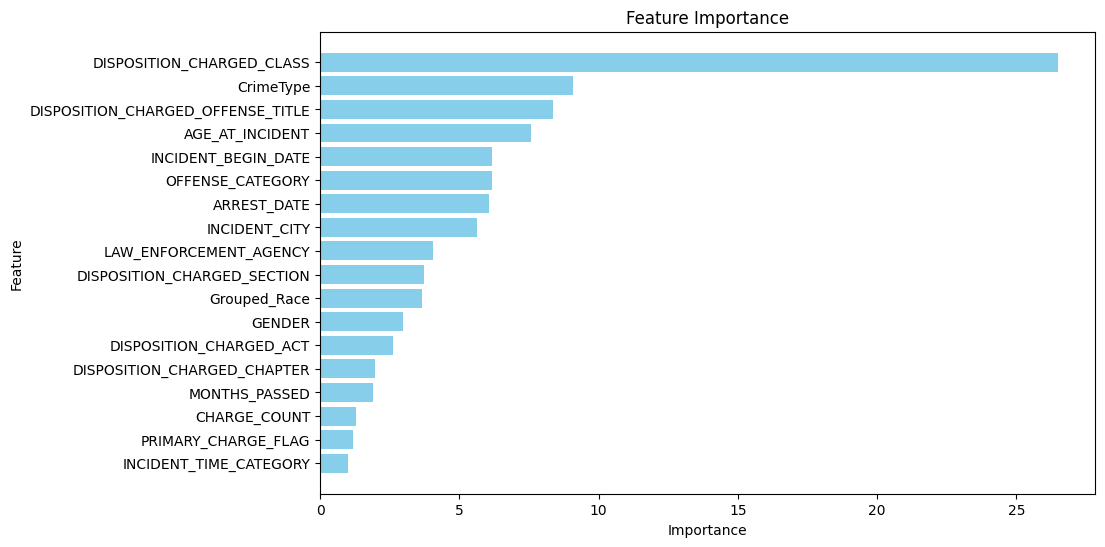

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your DataFrame containing the features
feature_names = X.columns

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


In [ ]:
predictions

array([['Prison'],
       ['Prison'],
       ['Prison'],
       ...,
       ['Probation'],
       ['Probation'],
       ['Jail']], dtype=object)

In [ ]:
X_test.head(3)

,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_COUNT,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,AGE_AT_INCIDENT,GENDER,INCIDENT_CITY,LAW_ENFORCEMENT_AGENCY,INCIDENT_BEGIN_DATE,ARREST_DATE,MONTHS_PASSED,INCIDENT_TIME_CATEGORY,CrimeType,Grouped_Race
11057,Dog Fighting,False,0.004902,BRING PERSON<AGE 13 TO SHOW,720,5,26-5(g),4,0.050000,Male,Chicago,CHICAGO PD,2010-04-18,2010-04-18 20:06:00,0.746154,Night,Gang,black
11100,Armed Violence,False,0.008170,AGGRAVATED UNLAWFUL RESTRAINT,720,5,10-3.1(a),3,0.016667,Male,Chicago,CHICAGO PD,2009-12-06,2010-04-15 17:50:00,0.748810,Day,Weapons Offenses,black
11142,Homicide,False,0.006536,FIRST DEGREE MURDER,720,5,9-1(a)(2),M,0.133333,Male,South Holland,PARK FOREST PD,2010-01-25,2010-04-20 10:00:00,0.747891,Day,Violent Crimes,black


In [ ]:
X_test['CHARGE_COUNT'].value_counts()

0.000000    23447
0.001634     4675
0.003268     2053
0.004902     1210
0.006536      767
            ...  
0.089869        1
0.196078        1
0.326797        1
0.065359        1
0.088235        1
Name: CHARGE_COUNT, Length: 70, dtype: int64

In [ ]:
len(X.columns)

18

In [ ]:
clf.feature_names_

['OFFENSE_CATEGORY',
 'PRIMARY_CHARGE_FLAG',
 'CHARGE_COUNT',
 'DISPOSITION_CHARGED_OFFENSE_TITLE',
 'DISPOSITION_CHARGED_CHAPTER',
 'DISPOSITION_CHARGED_ACT',
 'DISPOSITION_CHARGED_SECTION',
 'DISPOSITION_CHARGED_CLASS',
 'AGE_AT_INCIDENT',
 'GENDER',
 'INCIDENT_CITY',
 'LAW_ENFORCEMENT_AGENCY',
 'INCIDENT_BEGIN_DATE',
 'ARREST_DATE',
 'MONTHS_PASSED',
 'INCIDENT_TIME_CATEGORY',
 'CrimeType',
 'Grouped_Race']

In [ ]:
import pandas as pd

# new case data is provided as a dictionary where keys are column names
new_case_data = {
    'OFFENSE_CATEGORY': "Armed Violence",
    'PRIMARY_CHARGE_FLAG': "True",
    'CHARGE_COUNT': 0.008170,
    'DISPOSITION_CHARGED_OFFENSE_TITLE': "AGGRAVATED UNLAWFUL RESTRAINT",
    'DISPOSITION_CHARGED_CHAPTER': "720",
    'DISPOSITION_CHARGED_ACT': "5",
    'DISPOSITION_CHARGED_SECTION': "10-3.1(a)",
    'DISPOSITION_CHARGED_CLASS': "3",
    'AGE_AT_INCIDENT': 0.016667,
    'GENDER': "Male",
    'INCIDENT_CITY': "Chicago",
    'LAW_ENFORCEMENT_AGENCY': "CHICAGO PD",
    'INCIDENT_BEGIN_DATE': "2023-12-06",
    'ARREST_DATE': "2024-02-06",
    'MONTHS_PASSED': 0.748810,
    'INCIDENT_TIME_CATEGORY': "Day",
    'CrimeType': "Weapons Offenses",
    'Grouped_Race': "asian"
}

# Create a DataFrame for the new case
new_case_df = pd.DataFrame([new_case_data])

# You can also set the index if necessary
# new_case_df.set_index('some_index_column', inplace=True)
new_case_df['INCIDENT_BEGIN_DATE'] = pd.to_datetime(new_case_df['INCIDENT_BEGIN_DATE'])
new_case_df['ARREST_DATE'] = pd.to_datetime(new_case_df['ARREST_DATE'])

print("DataFrame for the new case:")
print(new_case_df)

DataFrame for the new case:
  OFFENSE_CATEGORY PRIMARY_CHARGE_FLAG  CHARGE_COUNT  \
0   Armed Violence                True       0.00817   

  DISPOSITION_CHARGED_OFFENSE_TITLE DISPOSITION_CHARGED_CHAPTER  \
0     AGGRAVATED UNLAWFUL RESTRAINT                         720   

  DISPOSITION_CHARGED_ACT DISPOSITION_CHARGED_SECTION  \
0                       5                   10-3.1(a)   

  DISPOSITION_CHARGED_CLASS  AGE_AT_INCIDENT GENDER INCIDENT_CITY  \
0                         3         0.016667   Male       Chicago   

  LAW_ENFORCEMENT_AGENCY INCIDENT_BEGIN_DATE ARREST_DATE  MONTHS_PASSED  \
0             CHICAGO PD          2023-12-06  2024-02-06        0.74881   

  INCIDENT_TIME_CATEGORY         CrimeType Grouped_Race  
0                    Day  Weapons Offenses        asian  


In [ ]:
feature_names = clf.feature_names_

# Access the original DataFrame to inspect data types
feature_data_types = X[feature_names].dtypes

print("Feature data types:")
print(feature_data_types)

Feature data types:
OFFENSE_CATEGORY                             object
PRIMARY_CHARGE_FLAG                          object
CHARGE_COUNT                                float64
DISPOSITION_CHARGED_OFFENSE_TITLE            object
DISPOSITION_CHARGED_CHAPTER                  object
DISPOSITION_CHARGED_ACT                      object
DISPOSITION_CHARGED_SECTION                  object
DISPOSITION_CHARGED_CLASS                    object
AGE_AT_INCIDENT                             float64
GENDER                                       object
INCIDENT_CITY                                object
LAW_ENFORCEMENT_AGENCY                       object
INCIDENT_BEGIN_DATE                  datetime64[ns]
ARREST_DATE                          datetime64[ns]
MONTHS_PASSED                               float64
INCIDENT_TIME_CATEGORY                       object
CrimeType                                    object
Grouped_Race                                 object
dtype: object


In [ ]:
new_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   OFFENSE_CATEGORY                   1 non-null      object        
 1   PRIMARY_CHARGE_FLAG                1 non-null      object        
 2   CHARGE_COUNT                       1 non-null      float64       
 3   DISPOSITION_CHARGED_OFFENSE_TITLE  1 non-null      object        
 4   DISPOSITION_CHARGED_CHAPTER        1 non-null      object        
 5   DISPOSITION_CHARGED_ACT            1 non-null      object        
 6   DISPOSITION_CHARGED_SECTION        1 non-null      object        
 7   DISPOSITION_CHARGED_CLASS          1 non-null      object        
 8   AGE_AT_INCIDENT                    1 non-null      float64       
 9   GENDER                             1 non-null      object        
 10  INCIDENT_CITY                      1 non-n

In [ ]:
# Use the trained model to make predictions on the new case
predictions_new_case = clf.predict(new_case_df)

print("Predicted result for the new case:", predictions_new_case)

Predicted result for the new case: [['Prison']]


In [ ]:
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import MinMaxScaler
# from catboost import CatBoostClassifier

# # Try a lower learning_rate

# # Assuming df is your DataFrame and 'SENTENCE_TYPE' is your target
# X = df.drop('SENTENCE_TYPE', axis=1)
# y = df['SENTENCE_TYPE']

# # Convert all categorical features to string
# X[categorical_features] = X[categorical_features].astype(str)

# # Preprocess numerical features
# scaler = MinMaxScaler()
# X[numerical_features] = scaler.fit_transform(X[numerical_features])

# # Initialize StratifiedKFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = []

# for train_index, test_index in skf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Initialize and train CatBoostClassifier
#     clf = CatBoostClassifier(
#         iterations=200,
#         learning_rate=0.3,
#         depth=8,
#         cat_features=categorical_features,  # Specify categorical features
#         verbose=False
#     )

#     clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

#     # Predict and calculate accuracy
#     predictions = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     cv_scores.append(accuracy)

# print(f"CV Accuracy Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'depth': [4, 6, 8]
# }

# # Initialize CatBoostClassifier
# clf = CatBoostClassifier(cat_features=categorical_features, verbose=False)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X, y)

# # Print best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)
